# **Evaluation of Credit Risk**
* Created by Ahmad Reginald Syahiran
* Presented as my capstone project for VIX at ID/X Partners

# **Business Understanding**

* The concept of credit risk revolves around the possibility of a borrower not repaying a loan
* Therefore, evaluating the likelihood of repayment by the borrower is vital in managing credit risk
* Machine learning can be utilized to streamline this evaluation process"

# **Analytical Approach**

* Analysis through description
* Analysis using graphical representations
* Predictive modeling via classification techniques

# **Data Requirement**

Dataset of customer loan from financial company

# **Data Collection**

Dataset is collected by ID/X Partners from a company

In [ ]:
#Mount Drive
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore")
from sklearn.preprocessing import OneHotEncoder

In [ ]:
df_cred = pd.read_csv('/content/drive/MyDrive/Credit Risk Assessment/loan_data_2007_2014.csv')
df_cred.head(2)

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-85,1.0,NaN,NaN,3.0,0.0,13648,83.7,9.0,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.0,0.00,0.00,Jan-15,171.62,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0.0,Apr-99,5.0,NaN,NaN,3.0,0.0,1687,9.4,4.0,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.0,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# **Data Understanding**

In [ ]:
df_cred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 75 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Unnamed: 0                   466285 non-null  int64  
 1   id                           466285 non-null  int64  
 2   member_id                    466285 non-null  int64  
 3   loan_amnt                    466285 non-null  int64  
 4   funded_amnt                  466285 non-null  int64  
 5   funded_amnt_inv              466285 non-null  float64
 6   term                         466285 non-null  object 
 7   int_rate                     466285 non-null  float64
 8   installment                  466285 non-null  float64
 9   grade                        466285 non-null  object 
 10  sub_grade                    466285 non-null  object 
 11  emp_title                    438697 non-null  object 
 12  emp_length                   445277 non-null  object 
 13 

## Missing Values

In [ ]:
full_non_null = [col for col in df_cred.columns if df_cred[col].isnull().all()]
print(full_non_null)
print(len(full_non_null),"column(s)")

['annual_inc_joint', 'dti_joint', 'verification_status_joint', 'open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util', 'inq_fi', 'total_cu_tl', 'inq_last_12m']
17 column(s)


* Identified 17 columns with complete data, suggesting their removal

In [ ]:
df_cred = df_cred.drop(axis=1, columns=full_non_null)
df_cred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 58 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Unnamed: 0                   466285 non-null  int64  
 1   id                           466285 non-null  int64  
 2   member_id                    466285 non-null  int64  
 3   loan_amnt                    466285 non-null  int64  
 4   funded_amnt                  466285 non-null  int64  
 5   funded_amnt_inv              466285 non-null  float64
 6   term                         466285 non-null  object 
 7   int_rate                     466285 non-null  float64
 8   installment                  466285 non-null  float64
 9   grade                        466285 non-null  object 
 10  sub_grade                    466285 non-null  object 
 11  emp_title                    438697 non-null  object 
 12  emp_length                   445277 non-null  object 
 13 

In [ ]:
percent_missing = df_cred.isnull().sum() * 100 / len(df_cred)
dtypes=[df_cred[col].dtype for col in df_cred.columns]
missing_value_df = pd.DataFrame({'data_type':dtypes,
                                 'percent_missing': percent_missing})
missing_value_df.sort_values('percent_missing', ascending=False, inplace=True)
missing_value_df.head(10)

,data_type,percent_missing
mths_since_last_record,float64,86.566585
mths_since_last_major_derog,float64,78.773926
desc,object,72.981546
mths_since_last_delinq,float64,53.690554
next_pymnt_d,object,48.728567
tot_cur_bal,float64,15.071469
tot_coll_amt,float64,15.071469
total_rev_hi_lim,float64,15.071469
emp_title,object,5.916553
emp_length,object,4.505399


### Data Absence Exceeding 50%:

* mths_since_last_record: Duration in months since the last noted public record.
* mths_since_last_major_derog: Time in months since the last significant derogatory mark, such as a 90-day or more severe credit rating.
* desc: Description of the loan as given by the loan applicant.
* mths_since_last_delinq: Interval in months since the applicant's most recent missed payment.

### Data Absence Between 40% and 50%:

* next_payment_d: The most recent month in which a loan payment was made.
### Data Absence Ranging from 1% to 20%:

* tot_cur_bal: Aggregate balance across all accounts at present.
* tot_coll_amt: Cumulative amount ever owed in collections.
* total_rev_hi_lim: Maximum limit of all revolving credit lines.
* emp_title: Job designation provided by the loan applicant.
* emp_length: Duration of employment, ranging from 0 (less than a year) to 10 (a decade or more).


In [ ]:
missing_value_df.tail(48)

,data_type,percent_missing
last_pymnt_d,object,0.080637
revol_util,float64,0.072917
collections_12_mths_ex_med,float64,0.031097
last_credit_pull_d,object,0.009007
pub_rec,float64,0.006219
inq_last_6mths,float64,0.006219
delinq_2yrs,float64,0.006219
open_acc,float64,0.006219
earliest_cr_line,object,0.006219
acc_now_delinq,float64,0.006219


Missing values below 1%:

* last_pymnt_d: The most recent month in which a payment was received.
* revol_util: The rate of usage of revolving credit lines compared to the total available credit.
* collections_12_mths_ex_med: Count of non-medical collections in the past 12 months.
* last_credit_pull_d: The latest month when the lender conducted a credit check for this loan.
* pub_rec: Tally of negative public records.
* inq_last_6mths: Inquiries in the past six months.
* delinq_2yrs: Instances of delinquency in the past two years.
* open_acc: Number of active credit lines in the borrower's credit report.
* earliest_cr_line: The opening month of the borrower's first credit line as reported.
* acc_now_delinq: Number of accounts where the borrower is currently behind in payments.
* total_acc: Total count of credit lines in the borrower's credit history.
* title	object

## Duplicated Data

In [ ]:
df_cred.duplicated().sum()

0

* There is no duplicated data in hthe dataset

# **Data Preparation**

## Handling Missing Values

### Removing `mths_since_last_record`, `desc`, and `next_pymnt_d`

In [ ]:
df_cred = df_cred[df_cred.columns[~df_cred.columns.isin(['mths_since_last_record','desc','next_pymnt_d'])]]
df_cred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 55 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Unnamed: 0                   466285 non-null  int64  
 1   id                           466285 non-null  int64  
 2   member_id                    466285 non-null  int64  
 3   loan_amnt                    466285 non-null  int64  
 4   funded_amnt                  466285 non-null  int64  
 5   funded_amnt_inv              466285 non-null  float64
 6   term                         466285 non-null  object 
 7   int_rate                     466285 non-null  float64
 8   installment                  466285 non-null  float64
 9   grade                        466285 non-null  object 
 10  sub_grade                    466285 non-null  object 
 11  emp_title                    438697 non-null  object 
 12  emp_length                   445277 non-null  object 
 13 

In [ ]:
df_cred.head(2)

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
0,0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-85,1.0,NaN,3.0,0.0,13648,83.7,9.0,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.0,0.00,0.00,Jan-15,171.62,Jan-16,0.0,NaN,1,INDIVIDUAL,0.0,NaN,NaN,NaN
1,1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://www.lendingclub.com/browse/loanDetail....,car,bike,309xx,GA,1.00,0.0,Apr-99,5.0,NaN,3.0,0.0,1687,9.4,4.0,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.0,117.08,1.11,Apr-13,119.66,Sep-13,0.0,NaN,1,INDIVIDUAL,0.0,NaN,NaN,NaN


### Imputation

* For `mths_since_last_major_derog` and `mths_since_last_delinq` (missing values above 50%), I imputed them with "0" (zero) value
* For others, I used its median value for numerical features and mode for categorical features

In [ ]:
for col in ['mths_since_last_major_derog','mths_since_last_delinq']:
    df_cred[col] = df_cred[col].fillna(0)

In [ ]:
df_cred[['mths_since_last_major_derog','mths_since_last_delinq']].isnull().sum()

mths_since_last_major_derog    0
mths_since_last_delinq         0
dtype: int64

In [ ]:
# Numerical columns
for col in df_cred.select_dtypes(exclude='object'):
    df_cred[col] = df_cred[col].fillna(df_cred[col].median())
df_cred.isnull().sum()

Unnamed: 0                         0
id                                 0
member_id                          0
loan_amnt                          0
funded_amnt                        0
funded_amnt_inv                    0
term                               0
int_rate                           0
installment                        0
grade                              0
sub_grade                          0
emp_title                      27588
emp_length                     21008
home_ownership                     0
annual_inc                         0
verification_status                0
issue_d                            0
loan_status                        0
pymnt_plan                         0
url                                0
purpose                            0
title                             20
zip_code                           0
addr_state                         0
dti                                0
delinq_2yrs                        0
earliest_cr_line                  29
i

In [ ]:
# Non numerical columns
for col in df_cred.select_dtypes(include='object'):
    df_cred[col] = df_cred[col].fillna(df_cred[col].mode().iloc[0])
print("Updated Missing Values")
df_cred.isnull().sum()

Updated Missing Values


Unnamed: 0                     0
id                             0
member_id                      0
loan_amnt                      0
funded_amnt                    0
funded_amnt_inv                0
term                           0
int_rate                       0
installment                    0
grade                          0
sub_grade                      0
emp_title                      0
emp_length                     0
home_ownership                 0
annual_inc                     0
verification_status            0
issue_d                        0
loan_status                    0
pymnt_plan                     0
url                            0
purpose                        0
title                          0
zip_code                       0
addr_state                     0
dti                            0
delinq_2yrs                    0
earliest_cr_line               0
inq_last_6mths                 0
mths_since_last_delinq         0
open_acc                       0
pub_rec   

In [ ]:
df_cred.head(3)

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
0,0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,Teacher,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-85,1.0,0.0,3.0,0.0,13648,83.7,9.0,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.0,0.00,0.00,Jan-15,171.62,Jan-16,0.0,0.0,1,INDIVIDUAL,0.0,0.0,81539.0,22800.0
1,1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://www.lendingclub.com/browse/loanDetail....,car,bike,309xx,GA,1.00,0.0,Apr-99,5.0,0.0,3.0,0.0,1687,9.4,4.0,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.0,117.08,1.11,Apr-13,119.66,Sep-13,0.0,0.0,1,INDIVIDUAL,0.0,0.0,81539.0,22800.0
2,2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,Teacher,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,small_business,real estate business,606xx,IL,8.72,0.0,Nov-01,2.0,0.0,2.0,0.0,2956,98.5,10.0,f,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.0,0.00,0.00,Jun-14,649.91,Jan-16,0.0,0.0,1,INDIVIDUAL,0.0,0.0,81539.0,22800.0


## Checking Unique Values

In [ ]:
print("Unique Features (Numerical)")
print(df_cred.select_dtypes(exclude='object').nunique())

Unique Features (Numerical)
Unnamed: 0                     466285
id                             466285
member_id                      466285
loan_amnt                        1352
funded_amnt                      1354
funded_amnt_inv                  9854
int_rate                          506
installment                     55622
annual_inc                      31901
dti                              3997
delinq_2yrs                        24
inq_last_6mths                     28
mths_since_last_delinq            145
open_acc                           62
pub_rec                            26
revol_bal                       58142
revol_util                       1269
total_acc                         112
out_prncp                      135665
out_prncp_inv                  141189
total_pymnt                    351609
total_pymnt_inv                347659
total_rec_prncp                172713
total_rec_int                  270249
total_rec_late_fee               5808
recoveries            

* `Unnamed: 0`, `id`, and `member_id` are unique  towards each of rows
* `policy_code` have only single unique value

In [ ]:
print("Unique Features (Categorical)")
print(df_cred.select_dtypes(exclude=['int','float']).nunique())

Unique Features (Categorical)
term                        2
grade                       7
sub_grade                  35
emp_title              205475
emp_length                 11
home_ownership              6
verification_status         3
issue_d                    91
loan_status                 9
pymnt_plan                  2
url                    466285
purpose                    14
title                   63099
zip_code                  888
addr_state                 50
earliest_cr_line          664
initial_list_status         2
last_pymnt_d               98
last_credit_pull_d        103
application_type            1
dtype: int64


* `emp_title`, `url`,`title`, `zip_code`, `earliest_cr_line` has more than 500 unique values
* `last_credit_pull_d`,`last_pymnt_d`,`issue_d`,`addr_state` have at least 50 unique values (below 500)
* `application_type` only have single unique value

In [ ]:
df_cred["term"].unique()

array([' 36 months', ' 60 months'], dtype=object)

* I need to clean the whitespace

In [ ]:
def word_strip(x):
  return x.strip()

df_cred['term'] = df_cred['term'].apply(lambda x: word_strip(x))
df_cred["term"].unique()

array(['36 months', '60 months'], dtype=object)

In [ ]:
df_cred["grade"].unique()

array(['B', 'C', 'A', 'E', 'F', 'D', 'G'], dtype=object)

In [ ]:
df_cred["sub_grade"].unique()

array(['B2', 'C4', 'C5', 'C1', 'B5', 'A4', 'E1', 'F2', 'C3', 'B1', 'D1',
       'A1', 'B3', 'B4', 'C2', 'D2', 'A3', 'A5', 'D5', 'A2', 'E4', 'D3',
       'D4', 'F3', 'E3', 'F4', 'F1', 'E5', 'G4', 'E2', 'G3', 'G2', 'G1',
       'F5', 'G5'], dtype=object)

In [ ]:
df_cred["emp_length"].unique()

array(['10+ years', '< 1 year', '1 year', '3 years', '8 years', '9 years',
       '4 years', '5 years', '6 years', '2 years', '7 years'],
      dtype=object)

In [ ]:
df_cred["home_ownership"].unique()

array(['RENT', 'OWN', 'MORTGAGE', 'OTHER', 'NONE', 'ANY'], dtype=object)

In [ ]:
df_cred["verification_status"].unique()

array(['Verified', 'Source Verified', 'Not Verified'], dtype=object)

In [ ]:
df_cred["purpose"].unique()

array(['credit_card', 'car', 'small_business', 'other', 'wedding',
       'debt_consolidation', 'home_improvement', 'major_purchase',
       'medical', 'moving', 'vacation', 'house', 'renewable_energy',
       'educational'], dtype=object)

## Formatting Target Variable

* `loan_status` would be our target variable
* However, I can not implement it directly on 9 unique values
* I will group them into group for binary classification

In [ ]:
df_cred["loan_status"].unique()

array(['Fully Paid', 'Charged Off', 'Current', 'Default',
       'Late (31-120 days)', 'In Grace Period', 'Late (16-30 days)',
       'Does not meet the credit policy. Status:Fully Paid',
       'Does not meet the credit policy. Status:Charged Off'],
      dtype=object)

* Good Loan (1) : `Fully Paid`, `Does not meet the credit policy. Status:Fully Paid`
* Bad Loan (0) : `Charged Off`, `Does not meet the credit policy. Status:Charged Off`, `Default`,  `Late (31-120 days)`
* Undetachable Loan (-1) : `Current`, `In Grace Period`, `Late (16-30 days)`
* I will use the Good Loan (1) and the Bad Loan (0) later for binary classification
* Later, Undetachable Loan (-1) columns will be dropped because it is still current loan in progress that can not be detected as good or bad

In [ ]:
# Define a dictionary for encoding target variable
target_dict = {'Fully Paid':1,
               'Does not meet the credit policy. Status:Fully Paid':1,
               'Charged Off':0,
               'Does not meet the credit policy. Status:Charged Off':0,
               'Default':0,
               'Late (31-120 days)':0,
               'Current':-1,
               'In Grace Period':-1,
               'Late (16-30 days)':-1}
# Create the mapped values in a new column
df_cred['loan_status'] = df_cred['loan_status'].map(target_dict)
# Review dataset
df_cred.head()

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
0,0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,Teacher,10+ years,RENT,24000.0,Verified,Dec-11,1,n,https://www.lendingclub.com/browse/loanDetail....,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-85,1.0,0.0,3.0,0.0,13648,83.7,9.0,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,Jan-15,171.62,Jan-16,0.0,0.0,1,INDIVIDUAL,0.0,0.0,81539.0,22800.0
1,1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,0,n,https://www.lendingclub.com/browse/loanDetail....,car,bike,309xx,GA,1.00,0.0,Apr-99,5.0,0.0,3.0,0.0,1687,9.4,4.0,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0,0.0,1,INDIVIDUAL,0.0,0.0,81539.0,22800.0
2,2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,Teacher,10+ years,RENT,12252.0,Not Verified,Dec-11,1,n,https://www.lendingclub.com/browse/loanDetail....,small_business,real estate business,606xx,IL,8.72,0.0,Nov-01,2.0,0.0,2.0,0.0,2956,98.5,10.0,f,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,Jun-14,649.91,Jan-16,0.0,0.0,1,INDIVIDUAL,0.0,0.0,81539.0,22800.0
3,3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,1,n,https://www.lendingclub.com/browse/loanDetail....,other,personel,917xx,CA,20.00,0.0,Feb-96,1.0,35.0,10.0,0.0,5598,21.0,37.0,f,0.0,0.0,12226.302210,12226.30,10000.00,2209.33,16.97,0.00,0.00,Jan-15,357.48,Jan-15,0.0,0.0,1,INDIVIDUAL,0.0,0.0,81539.0,22800.0
4,4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,-1,n,https://www.lendingclub.com/browse/loanDetail....,other,Personal,972xx,OR,17.94,0.0,Jan-96,0.0,38.0,15.0,0.0,27783,53.9,38.0,f,766.9,766.9,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,Jan-16,67.79,Jan-16,0.0,0.0,1,INDIVIDUAL,0.0,0.0,81539.0,22800.0


In [ ]:
df_cred = df_cred.loc[~df_cred['loan_status'].isin([-1])].reset_index(drop=True)
df_cred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 237695 entries, 0 to 237694
Data columns (total 55 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Unnamed: 0                   237695 non-null  int64  
 1   id                           237695 non-null  int64  
 2   member_id                    237695 non-null  int64  
 3   loan_amnt                    237695 non-null  int64  
 4   funded_amnt                  237695 non-null  int64  
 5   funded_amnt_inv              237695 non-null  float64
 6   term                         237695 non-null  object 
 7   int_rate                     237695 non-null  float64
 8   installment                  237695 non-null  float64
 9   grade                        237695 non-null  object 
 10  sub_grade                    237695 non-null  object 
 11  emp_title                    237695 non-null  object 
 12  emp_length                   237695 non-null  object 
 13 

In [ ]:
df_cred.tail()

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
237690,466276,9695736,11547808,8525,8525,8525.0,60 months,18.25,217.65,D,D3,MANAGER,5 years,MORTGAGE,37536.0,Verified,Jan-14,0,n,https://www.lendingclub.com/browse/loanDetail....,medical,Medical expenses,011xx,MA,12.28,4.0,Nov-94,0.0,3.0,12.0,0.0,5318,10.7,26.0,f,0.0,0.0,2029.930000,2029.93,360.08,510.45,0.0,1159.4,11.594,May-14,217.65,Oct-14,0.0,4.0,1,INDIVIDUAL,0.0,0.0,116995.0,49800.0
237691,466277,9007579,10799568,18000,18000,17975.0,36 months,7.90,563.23,A,A4,sales rep,3 years,RENT,90000.0,Verified,Jan-14,0,n,https://www.lendingclub.com/browse/loanDetail....,debt_consolidation,my loan,212xx,MD,10.33,1.0,Jul-98,0.0,14.0,16.0,0.0,8224,16.3,33.0,f,0.0,0.0,5631.670000,5623.85,4580.89,1050.78,0.0,0.0,0.000,Nov-14,563.23,Oct-14,0.0,14.0,1,INDIVIDUAL,0.0,0.0,42592.0,50300.0
237692,466278,9745590,11597671,10000,10000,10000.0,36 months,18.25,362.78,D,D3,MecÃ¡nica,10+ years,RENT,42000.0,Source Verified,Jan-14,1,n,https://www.lendingclub.com/browse/loanDetail....,vacation,Vacation,201xx,VA,11.57,0.0,Jun-02,0.0,29.0,9.0,0.0,3196,28.8,24.0,f,0.0,0.0,12394.165200,12394.17,10000.00,2394.17,0.0,0.0,0.000,Sep-15,5501.60,Jan-16,0.0,32.0,1,INDIVIDUAL,0.0,0.0,10170.0,11100.0
237693,466281,9684700,11536848,22000,22000,22000.0,60 months,19.97,582.50,D,D5,Chief of Interpretation (Park Ranger),10+ years,MORTGAGE,78000.0,Verified,Jan-14,0,n,https://www.lendingclub.com/browse/loanDetail....,debt_consolidation,Debt consolidation,377xx,TN,18.45,0.0,Jun-97,5.0,0.0,18.0,1.0,18238,46.3,30.0,f,0.0,0.0,4677.920000,4677.92,1837.04,2840.88,0.0,0.0,0.000,Dec-14,17.50,Jan-16,0.0,0.0,1,INDIVIDUAL,0.0,0.0,221830.0,39400.0
237694,466283,9604874,11457002,2000,2000,2000.0,36 months,7.90,62.59,A,A4,Server Engineer Lead,3 years,OWN,83000.0,Verified,Jan-14,1,n,https://www.lendingclub.com/browse/loanDetail....,credit_card,Credit card refinancing,913xx,CA,5.39,3.0,Feb-03,1.0,13.0,21.0,0.0,11404,21.5,27.0,w,0.0,0.0,2126.579838,2126.58,2000.00,126.58,0.0,0.0,0.000,Dec-14,1500.68,Apr-15,0.0,0.0,1,INDIVIDUAL,0.0,0.0,591610.0,53100.0


## Datetime setting

In [ ]:
# The month the borrower's earliest reported credit line was opened
df_cred['earliest_cr_line'].value_counts()

Oct-00    2056
Oct-99    1883
Nov-00    1847
Oct-01    1840
Nov-99    1807
          ... 
Nov-11       1
Dec-61       1
Sep-56       1
Jan-46       1
Nov-56       1
Name: earliest_cr_line, Length: 634, dtype: int64

In [ ]:
df_cred['earliest_cr_line'] = pd.to_datetime(df_cred['earliest_cr_line'], format='%b-%y')

In [ ]:
# The most recent month LC pulled credit for this loan
df_cred['last_credit_pull_d'].value_counts()

Jan-16    100503
Dec-15     13771
Nov-15      8233
Sep-15      7982
Oct-15      7846
Jul-15      7282
Aug-15      6521
Jun-15      6159
Apr-15      5661
Mar-15      5444
May-15      5309
Feb-15      4790
Jan-15      4753
Dec-14      3681
Oct-14      3346
Nov-14      3158
Sep-14      2957
Aug-14      2807
Jul-14      2768
May-14      2289
Jun-14      2228
Mar-14      2201
Apr-14      2188
Feb-14      1927
Jan-14      1791
Feb-13      1446
Nov-13      1407
Dec-13      1390
Oct-13      1271
Sep-13      1062
Aug-13      1048
Mar-13      1037
Jul-13      1020
May-13       997
Jun-13       851
Apr-13       836
Dec-12       576
Nov-12       576
Sep-12       525
Oct-12       515
Aug-12       505
Feb-12       420
Mar-12       402
May-12       388
Jul-12       384
Jun-12       376
Apr-12       360
Mar-11       335
Aug-11       305
Jan-12       286
Dec-11       278
Nov-11       227
May-11       227
Feb-11       210
Jun-11       204
Jul-11       186
Apr-11       185
Sep-11       184
Jan-11       1

In [ ]:
# Last month payment was received
df_cred['last_pymnt_d'].value_counts()

Jul-15    11703
Oct-15    11248
Sep-15    10204
Mar-15    10087
Jun-15    10078
Apr-15    10051
Aug-15     9939
May-15     9618
Nov-15     9280
Dec-15     9010
Jan-15     8611
Feb-15     8488
Oct-14     7676
Dec-14     7253
Sep-14     6316
Jul-14     6312
Aug-14     6305
Nov-14     6206
Jun-14     5620
May-14     4721
Mar-14     4572
Jan-16     4433
Apr-14     4327
Jan-14     3655
Feb-14     3632
Dec-13     3050
Oct-13     2832
Nov-13     2662
Aug-13     2515
Sep-13     2510
Jul-13     2395
May-13     2170
Mar-13     2070
Jun-13     1987
Apr-13     1910
Feb-13     1614
Jan-13     1479
Oct-12     1268
Nov-12     1198
Dec-12     1198
Aug-12     1134
Sep-12     1125
Jul-12      962
Mar-12      951
May-12      878
Jun-12      861
Apr-12      860
Feb-12      803
Mar-11      596
Dec-11      585
Jan-12      575
Apr-11      519
Sep-11      491
Nov-11      487
Oct-11      482
Aug-11      479
Jul-11      454
May-11      448
Jun-11      440
Feb-11      437
Dec-10      332
Jan-11      330
Oct-10  

In [ ]:
# The month which the loan was funded
df_cred['issue_d'].value_counts()

Oct-14    9704
Jul-14    9226
Apr-14    7121
Nov-13    6904
Dec-13    6893
Oct-13    6876
May-14    6825
Jan-14    6818
Aug-13    6569
Sep-13    6542
Mar-14    6507
Jul-13    6325
Jun-13    6153
Feb-14    6148
May-13    6023
Nov-12    5915
Oct-12    5868
Jun-14    5747
Sep-12    5705
Apr-13    5676
Aug-14    5613
Jan-13    5532
Dec-12    5481
Nov-14    5472
Aug-12    5084
Mar-13    5041
Feb-13    4660
Jul-12    4350
Jun-12    3580
May-12    3178
Apr-12    3053
Sep-14    2948
Mar-12    2747
Jan-12    2441
Feb-12    2411
Nov-11    2031
Dec-14    2025
Dec-11    1990
Oct-11    1914
Sep-11    1886
Aug-11    1771
Jul-11    1721
Jun-11    1705
May-11    1486
Apr-11    1415
Dec-10    1326
Jan-11    1313
Mar-11    1303
Oct-10    1232
Nov-10    1224
Jul-10    1204
Feb-11    1194
Sep-10    1189
Aug-10    1175
Jun-10    1105
May-10     989
Apr-10     912
Mar-10     828
Feb-10     682
Jan-10     662
Nov-09     662
Dec-09     658
Oct-09     604
Sep-09     507
Aug-09     446
Jul-09     411
Jun-09    

In [ ]:
df_cred[['issue_d','last_pymnt_d','last_credit_pull_d']].head(3)

,issue_d,last_pymnt_d,last_credit_pull_d
0,Dec-11,Jan-15,Jan-16
1,Dec-11,Apr-13,Sep-13
2,Dec-11,Jun-14,Jan-16


In [ ]:
def date_time(dt):
  if dt.year > 2016:
    dt = dt.replace(year=dt.year-100)
  return dt

In [ ]:
# Set standard datetime
df_cred['earliest_cr_line'] = pd.to_datetime(df_cred['earliest_cr_line'], format='%b-%y') # The month the borrower's earliest reported credit line was opened
df_cred['earliest_cr_line'] = df_cred['earliest_cr_line'].apply(lambda x: date_time(x))
df_cred['issue_d'] = pd.to_datetime(df_cred['issue_d'], format='%b-%y') # The month which the loan was funded
df_cred['last_pymnt_d'] = pd.to_datetime(df_cred['last_pymnt_d'],format='%b-%y') # Last month payment was received
df_cred['last_credit_pull_d'] = pd.to_datetime(df_cred['last_credit_pull_d'],format='%b-%y') # The most recent month LC pulled credit for this loan
df_cred[['earliest_cr_line','issue_d','last_pymnt_d','last_credit_pull_d']].head(3)

,earliest_cr_line,issue_d,last_pymnt_d,last_credit_pull_d
0,1985-01-01,2011-12-01,2015-01-01,2016-01-01
1,1999-04-01,2011-12-01,2013-04-01,2013-09-01
2,2001-11-01,2011-12-01,2014-06-01,2016-01-01


I created a new column for datetime:
* `pymnt_time` = the number of months between funded loan (`issue_d`) and last received payment (`last_pymnt_d`)
* `credit_pull_year` = the number of years between borrower's earliest reported credit line was opened (`earliest_cr_line`) and the most recent LC pulled credit for this loan (`last_credit_pull_d`)

In [ ]:
def diff_month(d1, d2):
    return (d1.year - d2.year) * 12 + d1.month - d2.month

In [ ]:
def diff_year(d1, d2):
    return (d1.year - d2.year)

In [ ]:
((df_cred.apply(lambda x: diff_month(x.last_pymnt_d, x.issue_d), axis=1) < 0)).any().any()

False

In [ ]:
((df_cred.apply(lambda x: diff_month(x.last_credit_pull_d, x.earliest_cr_line), axis=1) < 0)).any().any()

False

In [ ]:
df_cred['pymnt_time'] = df_cred.apply(lambda x: diff_month(x.last_pymnt_d, x.issue_d), axis=1)
df_cred['credit_pull_year'] = df_cred.apply(lambda x: diff_year(x.last_credit_pull_d, x.earliest_cr_line), axis=1)
print('Adding features succeed')

Adding features succeed


In [ ]:
df_cred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 237695 entries, 0 to 237694
Data columns (total 57 columns):
 #   Column                       Non-Null Count   Dtype         
---  ------                       --------------   -----         
 0   Unnamed: 0                   237695 non-null  int64         
 1   id                           237695 non-null  int64         
 2   member_id                    237695 non-null  int64         
 3   loan_amnt                    237695 non-null  int64         
 4   funded_amnt                  237695 non-null  int64         
 5   funded_amnt_inv              237695 non-null  float64       
 6   term                         237695 non-null  object        
 7   int_rate                     237695 non-null  float64       
 8   installment                  237695 non-null  float64       
 9   grade                        237695 non-null  object        
 10  sub_grade                    237695 non-null  object        
 11  emp_title                 

In [ ]:
df_cred.head(3)

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,pymnt_time,credit_pull_year
0,0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,Teacher,10+ years,RENT,24000.0,Verified,2011-12-01,1,n,https://www.lendingclub.com/browse/loanDetail....,credit_card,Computer,860xx,AZ,27.65,0.0,1985-01-01,1.0,0.0,3.0,0.0,13648,83.7,9.0,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.0,0.00,0.00,2015-01-01,171.62,2016-01-01,0.0,0.0,1,INDIVIDUAL,0.0,0.0,81539.0,22800.0,37,31
1,1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,2011-12-01,0,n,https://www.lendingclub.com/browse/loanDetail....,car,bike,309xx,GA,1.00,0.0,1999-04-01,5.0,0.0,3.0,0.0,1687,9.4,4.0,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.0,117.08,1.11,2013-04-01,119.66,2013-09-01,0.0,0.0,1,INDIVIDUAL,0.0,0.0,81539.0,22800.0,16,14
2,2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,Teacher,10+ years,RENT,12252.0,Not Verified,2011-12-01,1,n,https://www.lendingclub.com/browse/loanDetail....,small_business,real estate business,606xx,IL,8.72,0.0,2001-11-01,2.0,0.0,2.0,0.0,2956,98.5,10.0,f,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.0,0.00,0.00,2014-06-01,649.91,2016-01-01,0.0,0.0,1,INDIVIDUAL,0.0,0.0,81539.0,22800.0,30,15


In [ ]:
df_cred.to_csv('df_cred.csv', index=False)
!cp 'df_cred.csv' '/content/drive/MyDrive/Credit Risk Assessment'
print('Saving cleaned data is done!')

Saving cleaned data is done!


* This cleaned data will be analysed in Exploratory Data Analysis for extracting insights
* Now, I am going to prepare for predictive modelling

In [ ]:
df_cred = pd.read_csv('/content/drive/MyDrive/Credit Risk Assessment/df_cred.csv')
df_cred.head(2)

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,pymnt_time,credit_pull_year
0,0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,Teacher,10+ years,RENT,24000.0,Verified,2011-12-01,1,n,https://www.lendingclub.com/browse/loanDetail....,credit_card,Computer,860xx,AZ,27.65,0.0,1985-01-01,1.0,0.0,3.0,0.0,13648,83.7,9.0,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.0,0.00,0.00,2015-01-01,171.62,2016-01-01,0.0,0.0,1,INDIVIDUAL,0.0,0.0,81539.0,22800.0,37,31
1,1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,2011-12-01,0,n,https://www.lendingclub.com/browse/loanDetail....,car,bike,309xx,GA,1.00,0.0,1999-04-01,5.0,0.0,3.0,0.0,1687,9.4,4.0,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.0,117.08,1.11,2013-04-01,119.66,2013-09-01,0.0,0.0,1,INDIVIDUAL,0.0,0.0,81539.0,22800.0,16,14


## Analysing Descriptive Statistics

### Numerical Features

In [ ]:
df_cred.describe()

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,loan_status,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,pymnt_time,credit_pull_year
count,237695.000000,2.376950e+05,2.376950e+05,237695.000000,237695.000000,237695.000000,237695.000000,237695.000000,2.376950e+05,237695.000000,237695.000000,237695.000000,237695.000000,237695.000000,237695.000000,237695.000000,2.376950e+05,237695.000000,237695.000000,237695.000000,237695.000000,237695.000000,237695.000000,237695.00000,237695.000000,237695.000000,237695.000000,237695.000000,237695.000000,237695.000000,237695.000000,237695.0,237695.000000,2.376950e+05,2.376950e+05,2.376950e+05,237695.000000,237695.000000
mean,195200.469408,8.538434e+06,9.654050e+06,13474.354320,13428.704117,13299.951072,13.844646,416.623498,7.192614e+04,0.785574,16.428473,0.247266,0.906759,15.389314,10.853943,0.134551,1.522281e+04,54.972813,24.807181,328.398096,328.288404,13400.287691,13268.260483,11107.76574,2124.180394,0.922284,167.419279,17.579793,5686.209093,0.005856,7.617001,1.0,0.002886,1.445875e+02,1.211644e+05,2.734911e+04,18.656960,17.543516
std,133663.663387,9.261314e+06,1.005098e+07,8061.451689,8036.706263,8074.666938,4.378830,243.631791,5.516305e+04,0.410424,7.694727,0.733731,1.173825,22.604891,4.824864,0.420928,1.920837e+04,24.668079,11.662542,2186.834678,2186.195130,9397.236754,9409.265943,8162.54337,2153.943862,6.269179,764.502771,119.105531,6854.640584,0.082857,18.733495,0.0,0.058449,1.882389e+04,1.298310e+05,2.440079e+04,11.283279,7.047302
min,0.000000,5.473400e+04,7.047300e+04,500.000000,500.000000,0.000000,5.420000,15.670000,1.896000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,1.000000
25%,82615.500000,1.375144e+06,1.612612e+06,7200.000000,7200.000000,7125.000000,10.990000,239.180000,4.500000e+04,1.000000,10.710000,0.000000,0.000000,0.000000,7.000000,0.000000,5.911000e+03,37.200000,16.000000,0.000000,0.000000,6293.950000,6170.005000,4927.27500,743.845000,0.000000,0.000000,0.000000,419.580000,0.000000,0.000000,1.0,0.000000,0.000000e+00,3.974250e+04,1.640000e+04,10.000000,13.000000
50%,182944.000000,5.425530e+06,6.438294e+06,12000.000000,12000.000000,11900.000000,13.670000,365.010000,6.142500e+04,1.000000,16.130000,0.000000,1.000000,0.000000,10.000000,0.000000,1.098800e+04,56.700000,23.000000,0.000000,0.000000,11249.138230,11139.190000,9750.00000,1462.590000,0.000000,0.000000,0.000000,2973.230000,0.000000,0.000000,1.0,0.000000,0.000000e+00,8.153900e+04,2.280000e+04,16.000000,16.000000
75%,295296.000000,1.245681e+07,1.442943e+07,18000.000000,18000.000000,18000.000000,16.590000,545.330000,8.600000e+04,1.000000,21.870000,0.000000,1.000000,28.000000,13.000000,0.000000,1.906700e+04,74.400000,32.000000,0.000000,0.000000,18187.944480,18041.215000,15250.00000,2696.590000,0.000000,0.000000,0.000000,8852.010000,0.000000,0.000000,1.0,0.000000,0.000000e+00,1.568880e+05,2.940000e+04,27.000000,21.000000
max,466283.000000,3.785416e+07,4.061688e+07,35000.000000,35000.000000,35000.000000,26.060000,1408.130000,7.141778e+06,1.000000,39.990000,29.000000,33.000000,152.000000,76.000000,11.000000,1.746716e+06,892.300000,150.000000,32160.380000,32160.380000,57777.579870,57777.580000,35000.03000,22777.580000,358.680000,33520.270000,7002.190000,36234.440000,6.000000,154.000000,1.0,5.000000,9.152545e+06,8.000078e+06,2.013133e+06,95.000000,68.000000


### Categorical Features

In [ ]:
df_cred.describe(exclude=['int','float'])

,term,grade,sub_grade,emp_title,emp_length,home_ownership,verification_status,issue_d,pymnt_plan,url,purpose,title,zip_code,addr_state,earliest_cr_line,initial_list_status,last_pymnt_d,last_credit_pull_d,application_type
count,237695,237695,237695,237695,237695,237695,237695,237695,237695,237695,237695,237695,237695,237695,237695,237695,237695,237695,237695
unique,2,7,35,129469,11,6,3,91,2,237695,14,49854,874,50,634,2,98,103,1
top,36 months,B,B3,Teacher,10+ years,MORTGAGE,Verified,2014-10-01,n,https://www.lendingclub.com/browse/loanDetail....,debt_consolidation,Debt consolidation,945xx,CA,2000-10-01,f,2015-07-01,2016-01-01,INDIVIDUAL
freq,185700,71990,17316,15023,80095,116769,88337,9704,237689,1,138318,59815,3044,40386,2056,177046,11703,100503,237695


## Analysing Distribution Plot

In [ ]:
df_cred.dtypes.value_counts()

float64    28
object     19
int64      10
dtype: int64

In [ ]:
non_used = ['Unnamed: 0','id','member_id','policy_code', 'loan_status']
uni_dist = df_cred.select_dtypes(include=[np.float64,np.int64])
uni_dist = uni_dist[uni_dist.columns[~uni_dist.columns.isin(non_used)]]

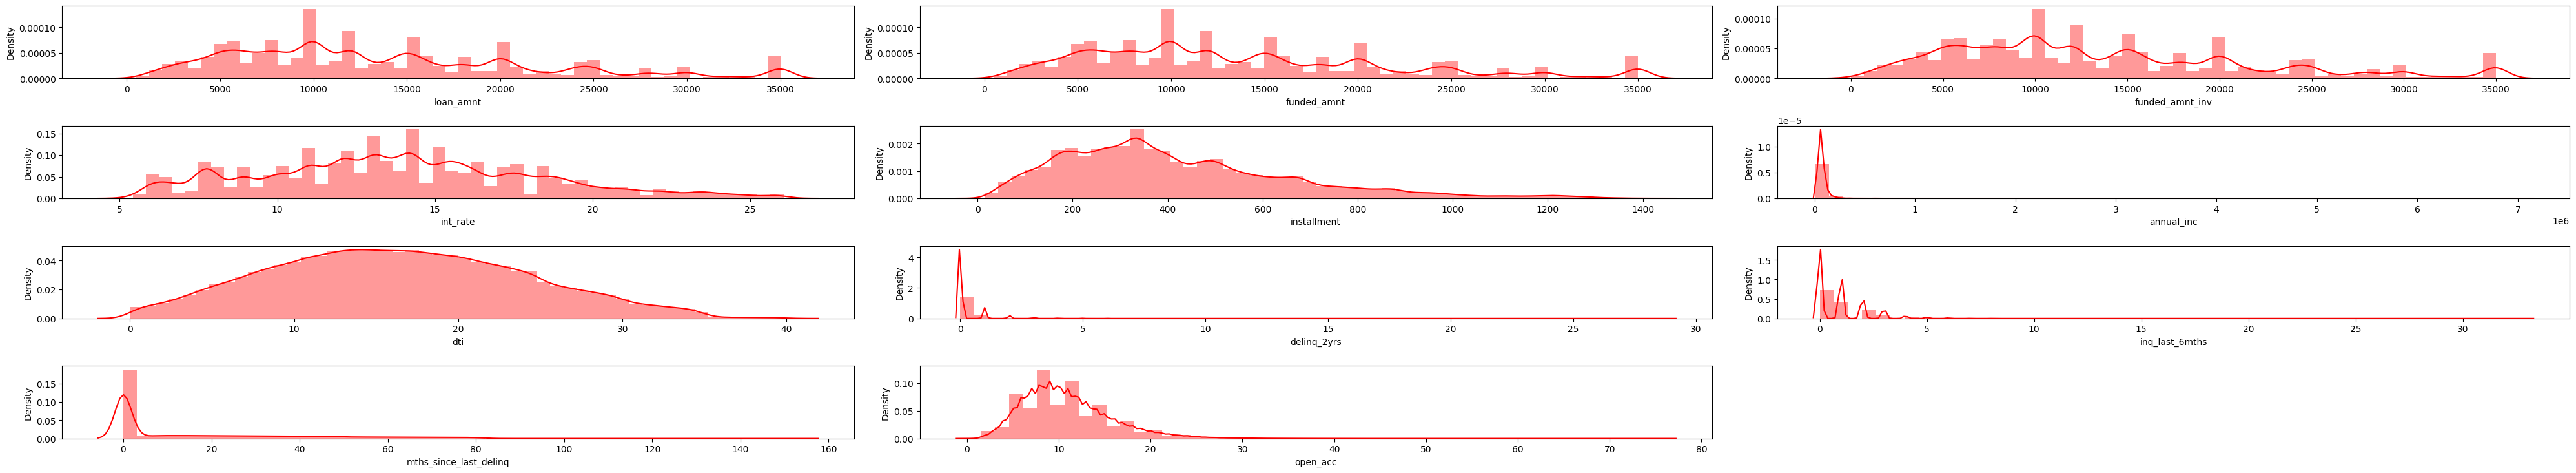

In [ ]:
plt.figure(figsize=(40, 20))
for i in range(0, 11):
    plt.subplot(11, 3, i+1)
    sns.distplot(uni_dist.iloc[:,i], color='red')
    plt.tight_layout()

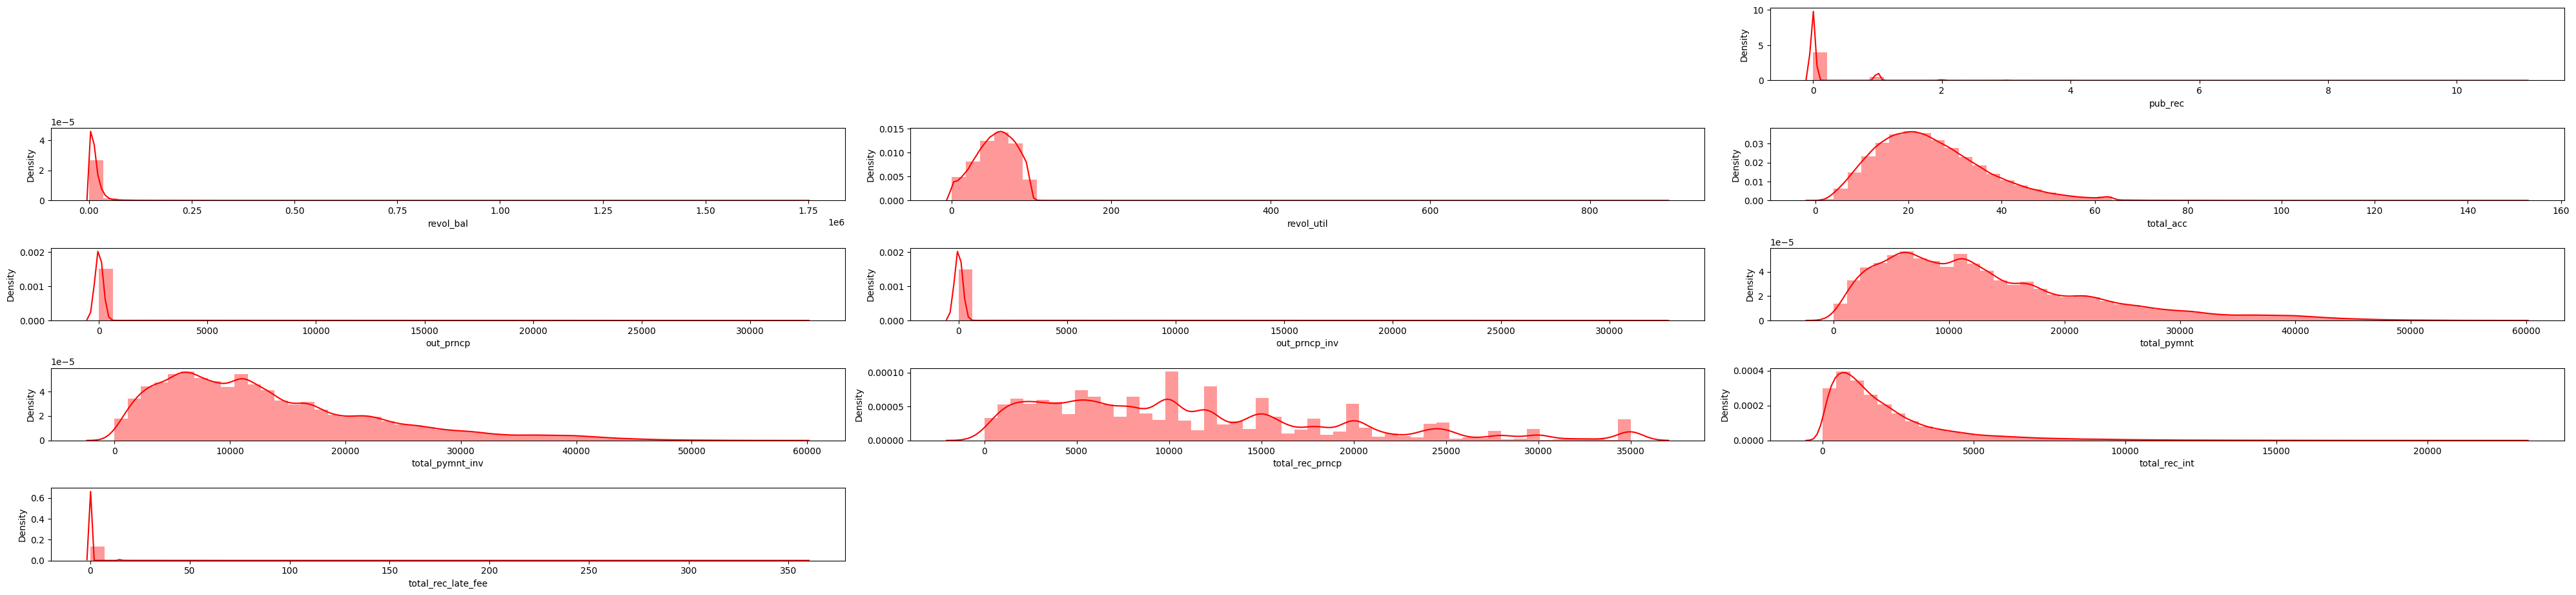

In [ ]:
plt.figure(figsize=(40, 20))
for i in range(11, 22):
    plt.subplot(11, 3, i+1)
    sns.distplot(uni_dist.iloc[:,i], color='red')
    plt.tight_layout()

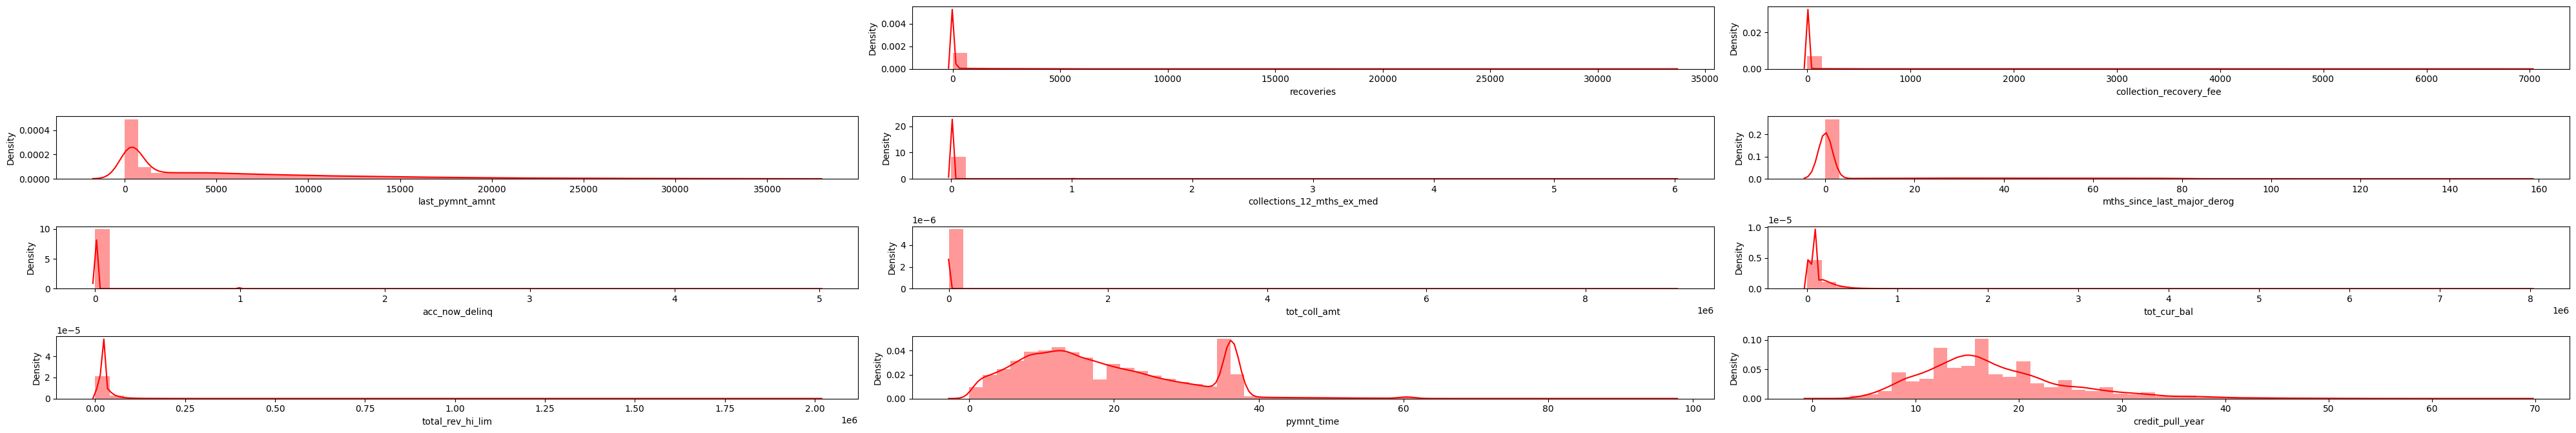

In [ ]:
plt.figure(figsize=(40, 20))
for i in range(22, 33):
    plt.subplot(12, 3, i+1)
    sns.distplot(uni_dist.iloc[:,i], color='red')
    plt.tight_layout()

* Most of the features are skewed
* Non skewed features: `loan_amnt`,`funded_amnt`,`funded_amnt_inv`,`int_rate`,`dti`

## Analysing Box Plot

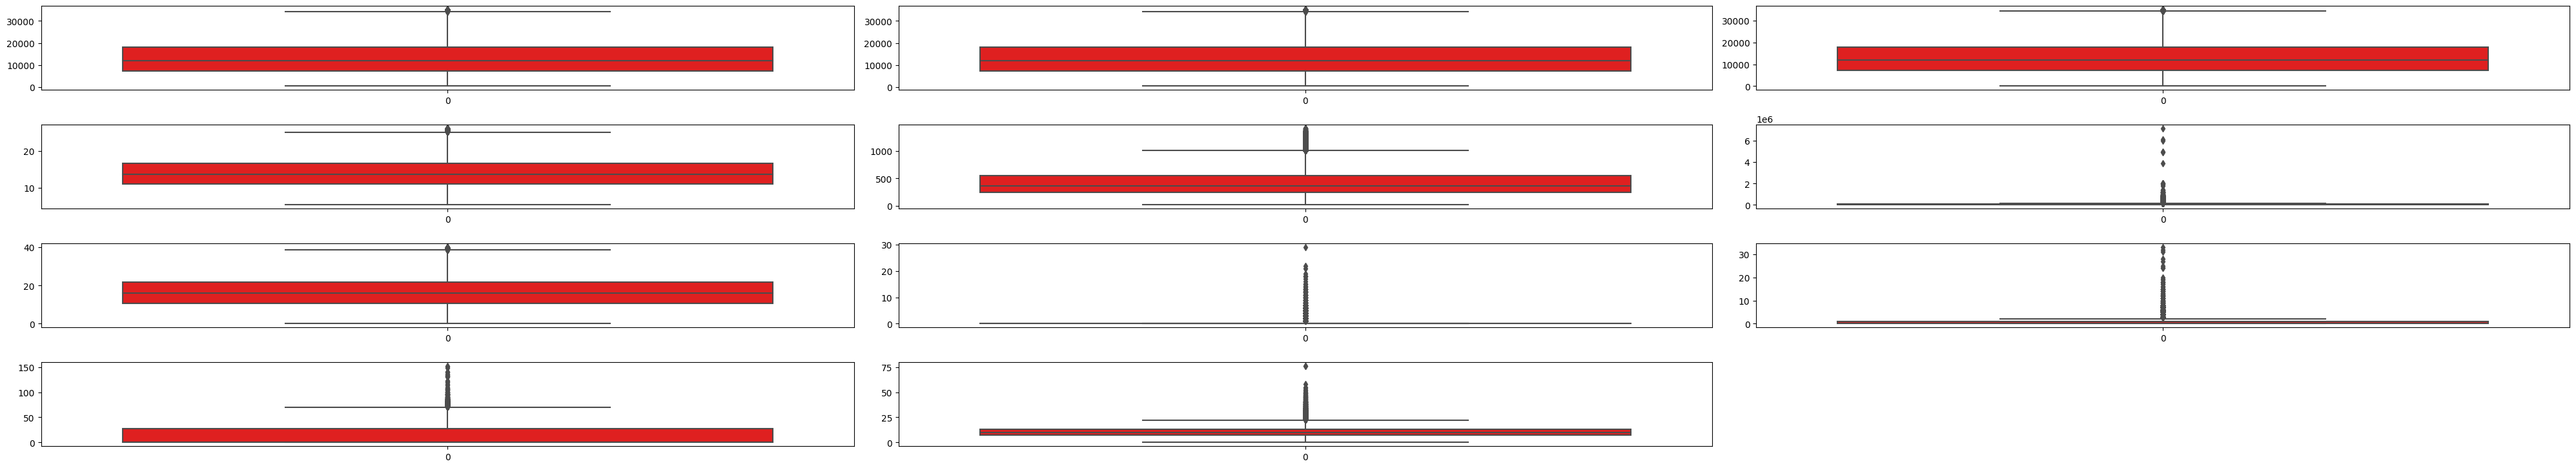

In [ ]:
plt.figure(figsize=(40, 20))
for i in range(0, 11):
    plt.subplot(11, 3, i+1)
    sns.boxplot(uni_dist.iloc[:,i], color='red',orient='v')
    plt.tight_layout()

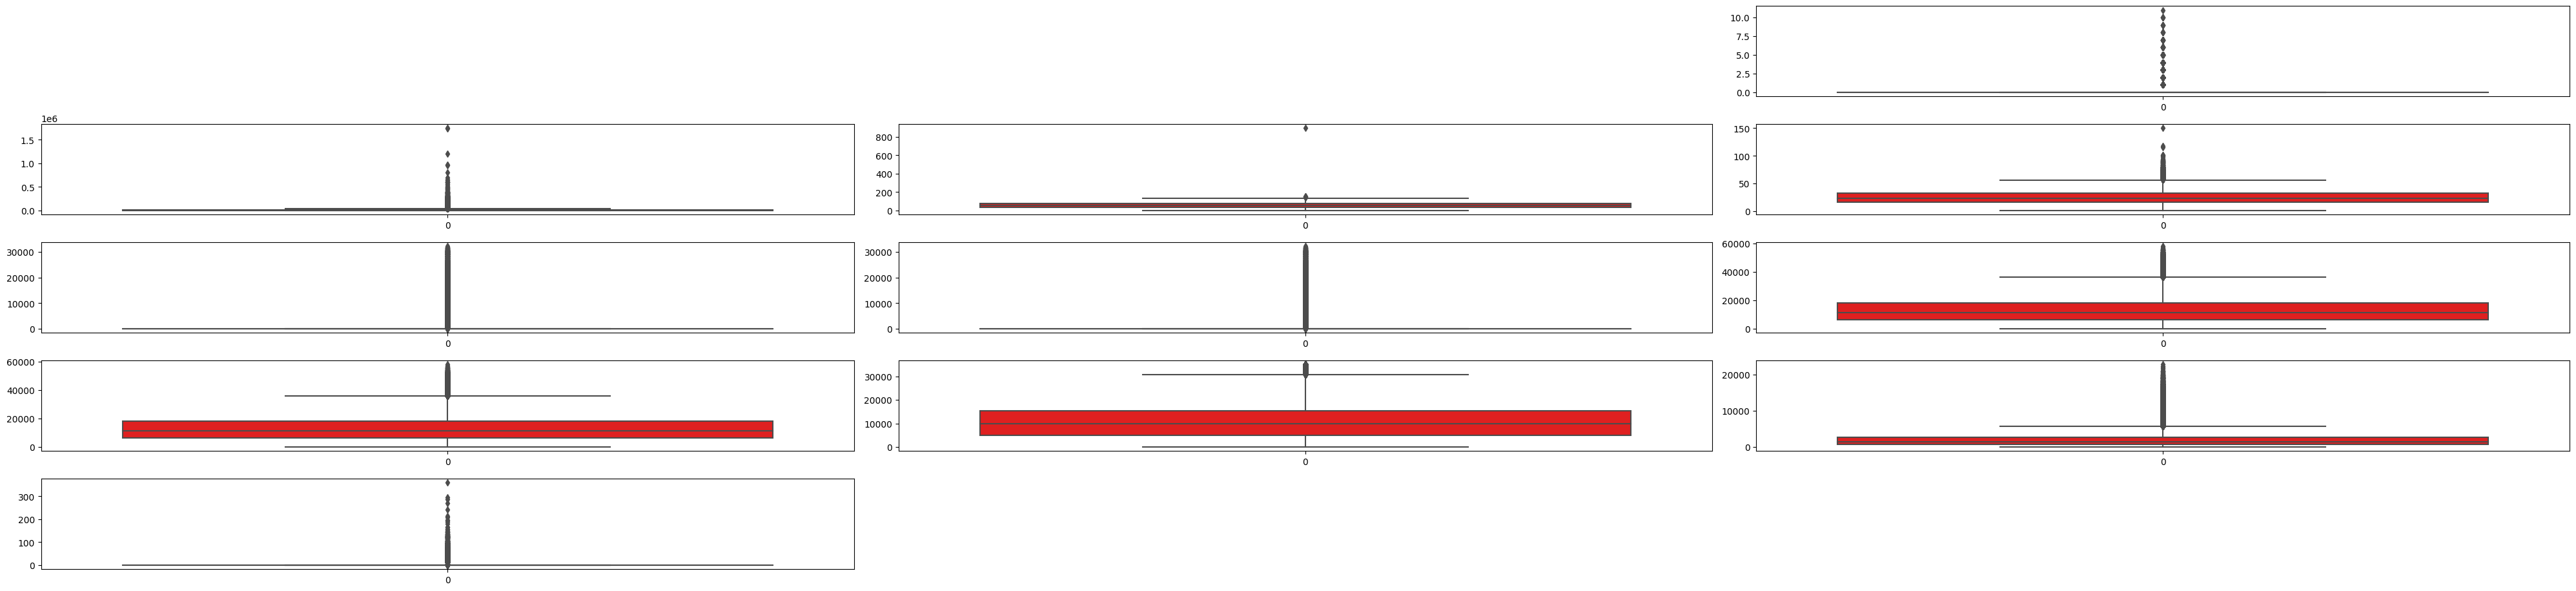

In [ ]:
plt.figure(figsize=(40, 20))
for i in range(11, 22):
    plt.subplot(11, 3, i+1)
    sns.boxplot(uni_dist.iloc[:,i], color='red',orient='v')
    plt.tight_layout()

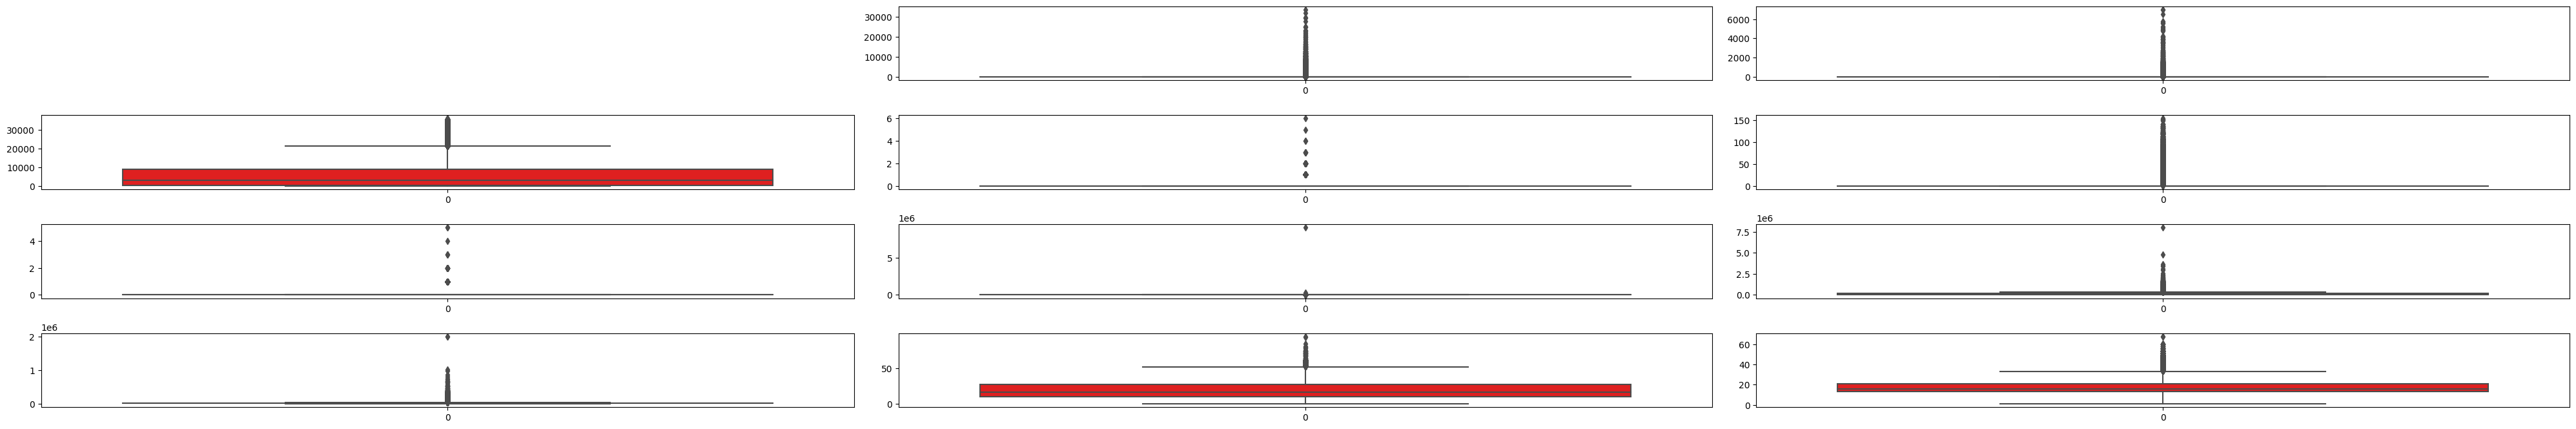

In [ ]:
plt.figure(figsize=(40, 20))
for i in range(22, 33):
    plt.subplot(12, 3, i+1)
    sns.boxplot(uni_dist.iloc[:,i], color='red',orient='v')
    plt.tight_layout()

* Most of the features have outliers
* Features with no outliers: `loan_amnt`,`funded_amnt`,`funded_amnt_inv`,`int_rate`

Severe outliers:
* installment
* annual_inc
* open_acc
* revol_bal
* total_pymnt_inv
* out_prncp
* total_rec_late_fee
* out_prncp_inv
* total_rec_prncp
* total_pymnt
* total_acc
* total_rec_int
* last_pymnt_amnt
* total_rev_hi_lim
* recoveries
* total_coll_amt
* pymnt_time
* collection_recovery_fee
* tot_cur_bal
* credit_pull_year

## Correlation Analysis for Feature Selection

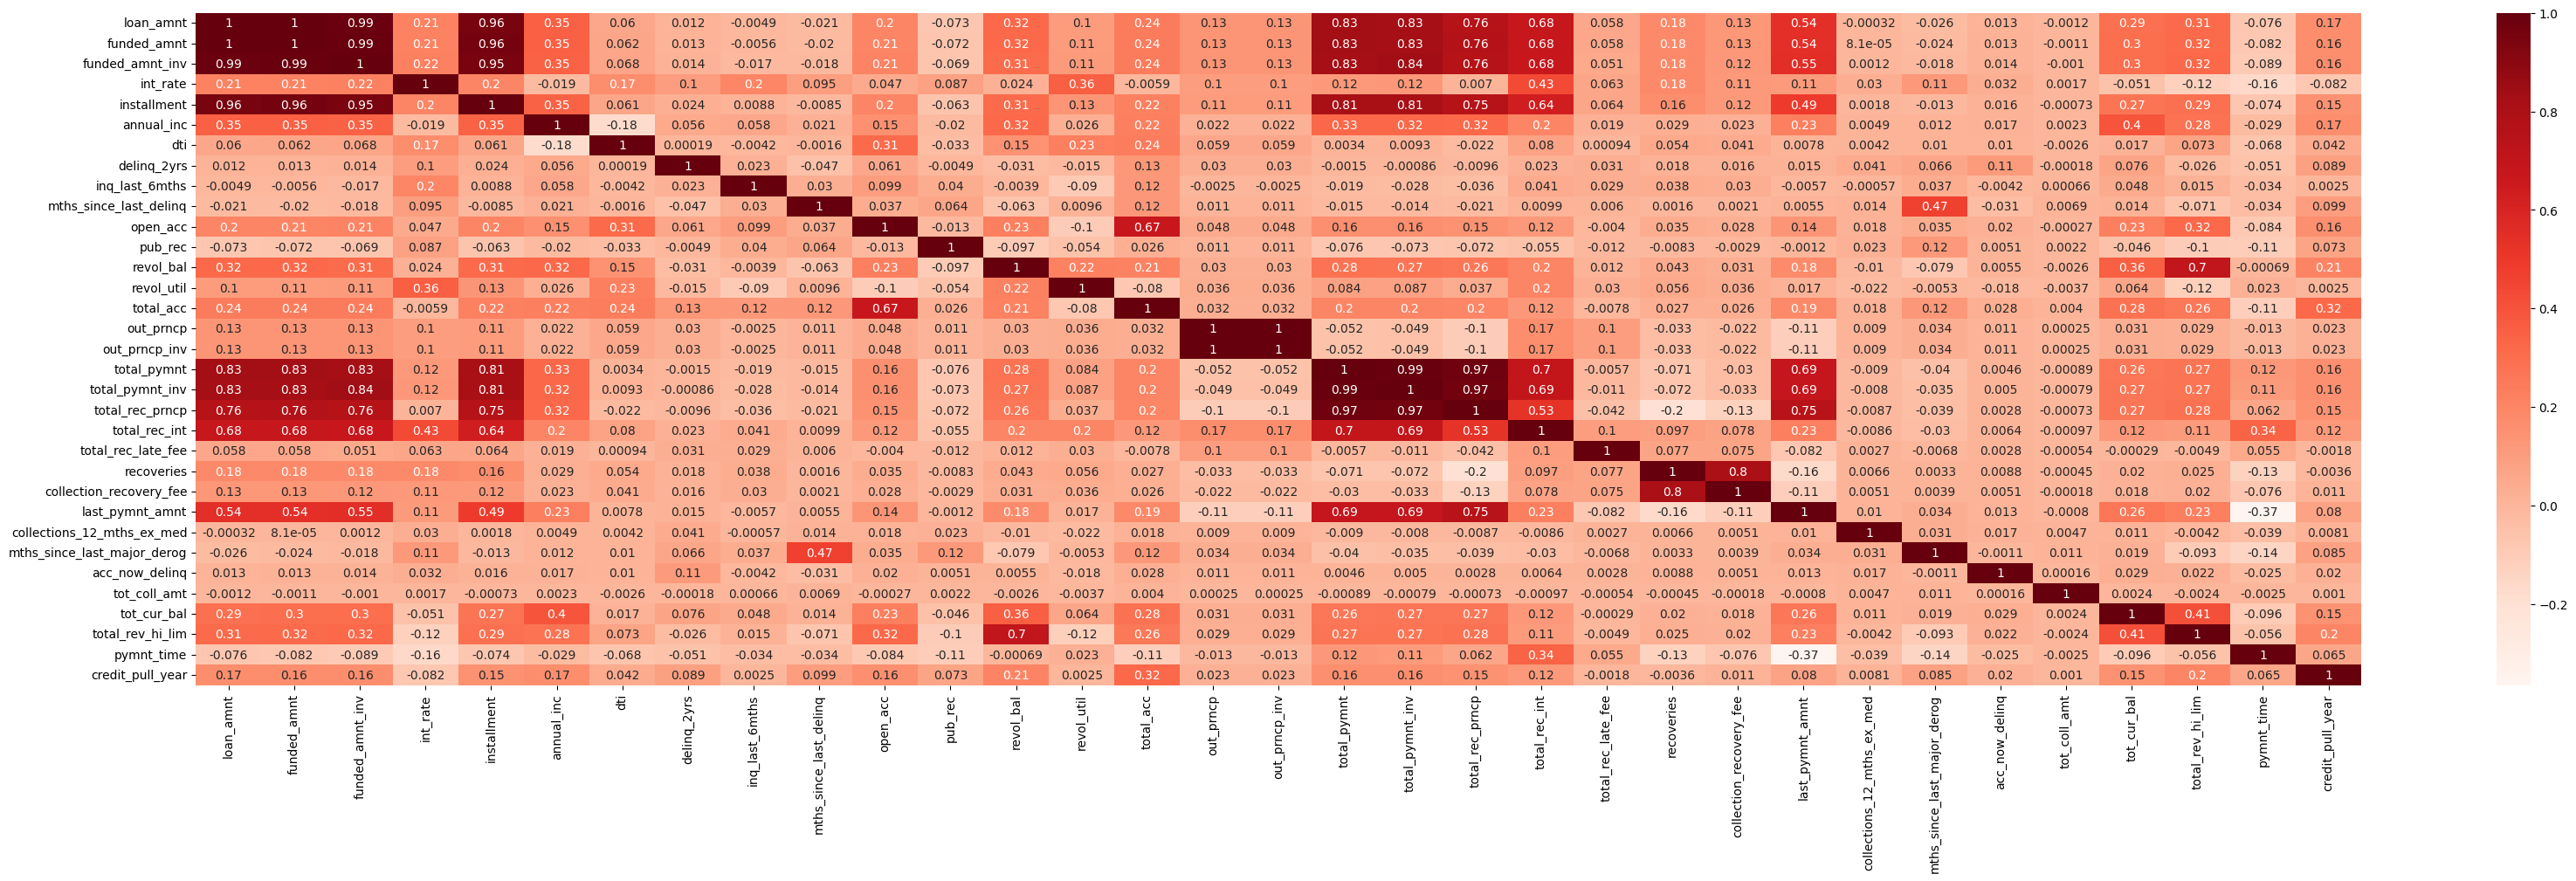

In [ ]:
non_used = ['Unnamed: 0','id','member_id','policy_code','loan_status']
uni_dist = df_cred.select_dtypes(include=[np.float64,np.int64])
uni_dist = uni_dist[uni_dist.columns[~uni_dist.columns.isin(non_used)]]
fig = plt.figure(figsize = (40,10))
sns.heatmap(uni_dist.corr(),cmap='Reds', annot = True);

In [ ]:
def top_correlation (df,n):
    corr_matrix = df.corr()
    correlation = (corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
                 .stack()
                 .sort_values(ascending=False))
    correlation = pd.DataFrame(correlation).reset_index()
    correlation.columns=["Variable_1","Variable_2","Correlation"]
    correlation = correlation.reindex(correlation.Correlation.abs().sort_values(ascending=False).index).reset_index().drop(["index"],axis=1)
    return correlation.head(n)
print("High Correlated Features (Corr > 0.5)")
top_correlation(uni_dist,39)

High Correlated Features (Corr > 0.5)


,Variable_1,Variable_2,Correlation
0,out_prncp,out_prncp_inv,0.999999
1,loan_amnt,funded_amnt,0.997286
2,total_pymnt,total_pymnt_inv,0.993913
3,funded_amnt,funded_amnt_inv,0.992104
4,loan_amnt,funded_amnt_inv,0.988784
5,total_pymnt,total_rec_prncp,0.973771
6,total_pymnt_inv,total_rec_prncp,0.968241
7,funded_amnt,installment,0.959611
8,loan_amnt,installment,0.955520
9,funded_amnt_inv,installment,0.951136


In [ ]:
df_corr = top_correlation(uni_dist,41)
df_corr.to_excel('df_corr_3.xlsx', index=False)
!cp 'df_corr_3.xlsx' '/content/drive/MyDrive/Credit Risk Assessment'
print('Saving correlation data is done!')

Saving correlation data is done!


In [ ]:
uni_dist.head()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,pymnt_time,credit_pull_year
0,5000,5000,4975.0,10.65,162.87,24000.0,27.65,0.0,1.0,0.0,3.0,0.0,13648,83.7,9.0,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,171.62,0.0,0.0,0.0,0.0,81539.0,22800.0,37,31
1,2500,2500,2500.0,15.27,59.83,30000.0,1.00,0.0,5.0,0.0,3.0,0.0,1687,9.4,4.0,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,119.66,0.0,0.0,0.0,0.0,81539.0,22800.0,16,14
2,2400,2400,2400.0,15.96,84.33,12252.0,8.72,0.0,2.0,0.0,2.0,0.0,2956,98.5,10.0,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,649.91,0.0,0.0,0.0,0.0,81539.0,22800.0,30,15
3,10000,10000,10000.0,13.49,339.31,49200.0,20.00,0.0,1.0,35.0,10.0,0.0,5598,21.0,37.0,0.0,0.0,12226.302210,12226.30,10000.00,2209.33,16.97,0.00,0.00,357.48,0.0,0.0,0.0,0.0,81539.0,22800.0,37,19
4,5000,5000,5000.0,7.90,156.46,36000.0,11.20,0.0,3.0,0.0,9.0,0.0,7963,28.3,12.0,0.0,0.0,5631.377753,5631.38,5000.00,631.38,0.00,0.00,0.00,161.03,0.0,0.0,0.0,0.0,81539.0,22800.0,37,11


* `emp_title`, `url`,`title`, `zip_code`, `earliest_cr_line` has more than 500 unique values
* `last_credit_pull_d`,`last_pymnt_d`,`issue_d`,`addr_state` have at least 50 unique values (below 500)
* `application_type` only have single unique value

In [ ]:
removed_unused = ['Unnamed: 0','id','member_id','policy_code','emp_title','url','title','zip_code','earliest_cr_line']
multicol = ['last_credit_pull_d','last_pymnt_d','issue_d','addr_state','application_type',
            'out_prncp_inv','funded_amnt','total_pymnt_inv','funded_amnt_inv','total_rec_prncp','out_prncp',
            'revol_bal','total_pymnt','recoveries','total_rec_int','total_acc','loan_amnt']
removed_all = removed_unused + multicol

In [ ]:
df_cred_a = df_cred[df_cred.columns[~df_cred.columns.isin(removed_all)]].reset_index(drop=True)
df_cred_b = df_cred[df_cred.columns[~df_cred.columns.isin(removed_unused)]].reset_index(drop=True)

In [ ]:
df_cred_a.head()

,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,pymnt_plan,purpose,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_util,initial_list_status,total_rec_late_fee,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,pymnt_time,credit_pull_year
0,36 months,10.65,162.87,B,B2,10+ years,RENT,24000.0,Verified,1,n,credit_card,27.65,0.0,1.0,0.0,3.0,0.0,83.7,f,0.00,0.00,171.62,0.0,0.0,0.0,0.0,81539.0,22800.0,37,31
1,60 months,15.27,59.83,C,C4,< 1 year,RENT,30000.0,Source Verified,0,n,car,1.00,0.0,5.0,0.0,3.0,0.0,9.4,f,0.00,1.11,119.66,0.0,0.0,0.0,0.0,81539.0,22800.0,16,14
2,36 months,15.96,84.33,C,C5,10+ years,RENT,12252.0,Not Verified,1,n,small_business,8.72,0.0,2.0,0.0,2.0,0.0,98.5,f,0.00,0.00,649.91,0.0,0.0,0.0,0.0,81539.0,22800.0,30,15
3,36 months,13.49,339.31,C,C1,10+ years,RENT,49200.0,Source Verified,1,n,other,20.00,0.0,1.0,35.0,10.0,0.0,21.0,f,16.97,0.00,357.48,0.0,0.0,0.0,0.0,81539.0,22800.0,37,19
4,36 months,7.90,156.46,A,A4,3 years,RENT,36000.0,Source Verified,1,n,wedding,11.20,0.0,3.0,0.0,9.0,0.0,28.3,f,0.00,0.00,161.03,0.0,0.0,0.0,0.0,81539.0,22800.0,37,11


In [ ]:
df_cred_b.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,addr_state,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,pymnt_time,credit_pull_year
0,5000,5000,4975.0,36 months,10.65,162.87,B,B2,10+ years,RENT,24000.0,Verified,2011-12-01,1,n,credit_card,AZ,27.65,0.0,1.0,0.0,3.0,0.0,13648,83.7,9.0,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,2015-01-01,171.62,2016-01-01,0.0,0.0,INDIVIDUAL,0.0,0.0,81539.0,22800.0,37,31
1,2500,2500,2500.0,60 months,15.27,59.83,C,C4,< 1 year,RENT,30000.0,Source Verified,2011-12-01,0,n,car,GA,1.00,0.0,5.0,0.0,3.0,0.0,1687,9.4,4.0,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,2013-04-01,119.66,2013-09-01,0.0,0.0,INDIVIDUAL,0.0,0.0,81539.0,22800.0,16,14
2,2400,2400,2400.0,36 months,15.96,84.33,C,C5,10+ years,RENT,12252.0,Not Verified,2011-12-01,1,n,small_business,IL,8.72,0.0,2.0,0.0,2.0,0.0,2956,98.5,10.0,f,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,2014-06-01,649.91,2016-01-01,0.0,0.0,INDIVIDUAL,0.0,0.0,81539.0,22800.0,30,15
3,10000,10000,10000.0,36 months,13.49,339.31,C,C1,10+ years,RENT,49200.0,Source Verified,2011-12-01,1,n,other,CA,20.00,0.0,1.0,35.0,10.0,0.0,5598,21.0,37.0,f,0.0,0.0,12226.302210,12226.30,10000.00,2209.33,16.97,0.00,0.00,2015-01-01,357.48,2015-01-01,0.0,0.0,INDIVIDUAL,0.0,0.0,81539.0,22800.0,37,19
4,5000,5000,5000.0,36 months,7.90,156.46,A,A4,3 years,RENT,36000.0,Source Verified,2011-12-01,1,n,wedding,AZ,11.20,0.0,3.0,0.0,9.0,0.0,7963,28.3,12.0,f,0.0,0.0,5631.377753,5631.38,5000.00,631.38,0.00,0.00,0.00,2015-01-01,161.03,2015-09-01,0.0,0.0,INDIVIDUAL,0.0,0.0,81539.0,22800.0,37,11


In [ ]:
df_cred_a.to_csv('df_cred_a.csv', index=False)
!cp 'df_cred_a.csv' '/content/drive/MyDrive/Credit Risk Assessment'
print('Saving cleaned data is done!')

df_cred_b.to_csv('df_cred_b.csv', index=False)
!cp 'df_cred_b.csv' '/content/drive/MyDrive/Credit Risk Assessment'
print('Saving cleaned data is done!')

Saving cleaned data is done!
Saving cleaned data is done!


## Categorical Encoding

In [ ]:
df_cred_a = pd.read_csv('/content/drive/MyDrive/Credit Risk Assessment/df_cred_a.csv')
df_cred_a.head(2)

,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,pymnt_plan,purpose,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_util,initial_list_status,total_rec_late_fee,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,pymnt_time,credit_pull_year
0,36 months,10.65,162.87,B,B2,10+ years,RENT,24000.0,Verified,1,n,credit_card,27.65,0.0,1.0,0.0,3.0,0.0,83.7,f,0.0,0.00,171.62,0.0,0.0,0.0,0.0,81539.0,22800.0,37,31
1,60 months,15.27,59.83,C,C4,< 1 year,RENT,30000.0,Source Verified,0,n,car,1.00,0.0,5.0,0.0,3.0,0.0,9.4,f,0.0,1.11,119.66,0.0,0.0,0.0,0.0,81539.0,22800.0,16,14


In [ ]:
df_cred_a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 237695 entries, 0 to 237694
Data columns (total 31 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   term                         237695 non-null  object 
 1   int_rate                     237695 non-null  float64
 2   installment                  237695 non-null  float64
 3   grade                        237695 non-null  object 
 4   sub_grade                    237695 non-null  object 
 5   emp_length                   237695 non-null  object 
 6   home_ownership               237695 non-null  object 
 7   annual_inc                   237695 non-null  float64
 8   verification_status          237695 non-null  object 
 9   loan_status                  237695 non-null  int64  
 10  pymnt_plan                   237695 non-null  object 
 11  purpose                      237695 non-null  object 
 12  dti                          237695 non-null  float64
 13 

In [ ]:
df_cred_b = pd.read_csv('/content/drive/MyDrive/Credit Risk Assessment/df_cred_b.csv')
df_cred_b.head(2)

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,addr_state,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,pymnt_time,credit_pull_year
0,5000,5000,4975.0,36 months,10.65,162.87,B,B2,10+ years,RENT,24000.0,Verified,2011-12-01,1,n,credit_card,AZ,27.65,0.0,1.0,0.0,3.0,0.0,13648,83.7,9.0,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.0,0.00,0.00,2015-01-01,171.62,2016-01-01,0.0,0.0,INDIVIDUAL,0.0,0.0,81539.0,22800.0,37,31
1,2500,2500,2500.0,60 months,15.27,59.83,C,C4,< 1 year,RENT,30000.0,Source Verified,2011-12-01,0,n,car,GA,1.00,0.0,5.0,0.0,3.0,0.0,1687,9.4,4.0,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.0,117.08,1.11,2013-04-01,119.66,2013-09-01,0.0,0.0,INDIVIDUAL,0.0,0.0,81539.0,22800.0,16,14


In [ ]:
df_cred_a["term"].unique()

array(['36 months', '60 months'], dtype=object)

In [ ]:
def text_num(text):
  return [int(s) for s in text.split() if s.isdigit()][0]

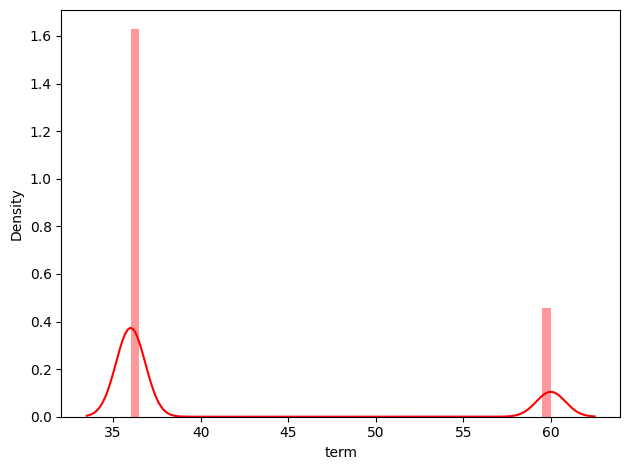

In [ ]:
sns.distplot(df_cred_a["term"].apply(lambda x: text_num(x)), color='red')
plt.tight_layout()
plt.show()

In [ ]:
df_cred_a["term"] = df_cred_a["term"].apply(lambda x: text_num(x))
df_cred_a.head()

,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,pymnt_plan,purpose,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_util,initial_list_status,total_rec_late_fee,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,pymnt_time,credit_pull_year
0,36,10.65,162.87,B,B2,10+ years,RENT,24000.0,Verified,1,n,credit_card,27.65,0.0,1.0,0.0,3.0,0.0,83.7,f,0.00,0.00,171.62,0.0,0.0,0.0,0.0,81539.0,22800.0,37,31
1,60,15.27,59.83,C,C4,< 1 year,RENT,30000.0,Source Verified,0,n,car,1.00,0.0,5.0,0.0,3.0,0.0,9.4,f,0.00,1.11,119.66,0.0,0.0,0.0,0.0,81539.0,22800.0,16,14
2,36,15.96,84.33,C,C5,10+ years,RENT,12252.0,Not Verified,1,n,small_business,8.72,0.0,2.0,0.0,2.0,0.0,98.5,f,0.00,0.00,649.91,0.0,0.0,0.0,0.0,81539.0,22800.0,30,15
3,36,13.49,339.31,C,C1,10+ years,RENT,49200.0,Source Verified,1,n,other,20.00,0.0,1.0,35.0,10.0,0.0,21.0,f,16.97,0.00,357.48,0.0,0.0,0.0,0.0,81539.0,22800.0,37,19
4,36,7.90,156.46,A,A4,3 years,RENT,36000.0,Source Verified,1,n,wedding,11.20,0.0,3.0,0.0,9.0,0.0,28.3,f,0.00,0.00,161.03,0.0,0.0,0.0,0.0,81539.0,22800.0,37,11


In [ ]:
df_cred_a["grade"].unique()

array(['B', 'C', 'A', 'E', 'F', 'D', 'G'], dtype=object)

In [ ]:
# Define a dictionary for encoding ordinal variable
target_dict = {'A':6,
               'B':5,
               'C':4,
               'D':3,
               'E':2,
               'F':1,
               'G':0}
# Create the mapped values in a new column
df_cred_a["grade"] = df_cred_a["grade"].map(target_dict)

In [ ]:
# Review dataset
df_cred_a.head()

,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,pymnt_plan,purpose,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_util,initial_list_status,total_rec_late_fee,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,pymnt_time,credit_pull_year
0,36,10.65,162.87,5,B2,10+ years,RENT,24000.0,Verified,1,n,credit_card,27.65,0.0,1.0,0.0,3.0,0.0,83.7,f,0.00,0.00,171.62,0.0,0.0,0.0,0.0,81539.0,22800.0,37,31
1,60,15.27,59.83,4,C4,< 1 year,RENT,30000.0,Source Verified,0,n,car,1.00,0.0,5.0,0.0,3.0,0.0,9.4,f,0.00,1.11,119.66,0.0,0.0,0.0,0.0,81539.0,22800.0,16,14
2,36,15.96,84.33,4,C5,10+ years,RENT,12252.0,Not Verified,1,n,small_business,8.72,0.0,2.0,0.0,2.0,0.0,98.5,f,0.00,0.00,649.91,0.0,0.0,0.0,0.0,81539.0,22800.0,30,15
3,36,13.49,339.31,4,C1,10+ years,RENT,49200.0,Source Verified,1,n,other,20.00,0.0,1.0,35.0,10.0,0.0,21.0,f,16.97,0.00,357.48,0.0,0.0,0.0,0.0,81539.0,22800.0,37,19
4,36,7.90,156.46,6,A4,3 years,RENT,36000.0,Source Verified,1,n,wedding,11.20,0.0,3.0,0.0,9.0,0.0,28.3,f,0.00,0.00,161.03,0.0,0.0,0.0,0.0,81539.0,22800.0,37,11


In [ ]:
df_cred_a["sub_grade"].unique()

array(['B2', 'C4', 'C5', 'C1', 'A4', 'E1', 'F2', 'B5', 'C3', 'B1', 'D1',
       'A1', 'B3', 'B4', 'C2', 'D2', 'A3', 'A5', 'D5', 'A2', 'E4', 'D3',
       'D4', 'F3', 'E3', 'F1', 'E5', 'G4', 'E2', 'G2', 'G1', 'F5', 'F4',
       'G5', 'G3'], dtype=object)

In [ ]:
def f_A(row):
    if row == 'A1':
        val = 1
    elif row == 'A2':
        val = 2
    elif row == 'A3':
        val = 3
    elif row == 'A4':
        val = 4
    elif row == 'A5':
        val = 5
    else:
        val = 0
    return val

def f_B(row):
    if row == 'B1':
        val = 1
    elif row == 'B2':
        val = 2
    elif row == 'B3':
        val = 3
    elif row == 'B4':
        val = 4
    elif row == 'B5':
        val = 5
    else:
        val = 0
    return val

def f_C(row):
    if row == 'C1':
        val = 1
    elif row == 'C2':
        val = 2
    elif row == 'C3':
        val = 3
    elif row == 'C4':
        val = 4
    elif row == 'C5':
        val = 5
    else:
        val = 0
    return val

def f_D(row):
    if row == 'D1':
        val = 1
    elif row == 'D2':
        val = 2
    elif row == 'D3':
        val = 3
    elif row == 'D4':
        val = 4
    elif row == 'D5':
        val = 5
    else:
        val = 0
    return val

def f_E(row):
    if row == 'E1':
        val = 1
    elif row == 'E2':
        val = 2
    elif row == 'E3':
        val = 3
    elif row == 'E4':
        val = 4
    elif row == 'E5':
        val = 5
    else:
        val = 0
    return val

def f_F(row):
    if row == 'F1':
        val = 1
    elif row == 'F2':
        val = 2
    elif row == 'F3':
        val = 3
    elif row == 'F4':
        val = 4
    elif row == 'F5':
        val = 5
    else:
        val = 0
    return val

def f_G(row):
    if row == 'G1':
        val = 1
    elif row == 'G2':
        val = 2
    elif row == 'G3':
        val = 3
    elif row == 'G4':
        val = 4
    elif row == 'G5':
        val = 5
    else:
        val = 0
    return val

In [ ]:
df_cred_a['SubGrade_A'] = df_cred_a["sub_grade"].apply(f_A)
df_cred_a['SubGrade_B'] = df_cred_a["sub_grade"].apply(f_B)
df_cred_a['SubGrade_C'] = df_cred_a["sub_grade"].apply(f_C)
df_cred_a['SubGrade_D'] = df_cred_a["sub_grade"].apply(f_D)
df_cred_a['SubGrade_E'] = df_cred_a["sub_grade"].apply(f_E)
df_cred_a['SubGrade_F'] = df_cred_a["sub_grade"].apply(f_F)
df_cred_a['SubGrade_G'] = df_cred_a["sub_grade"].apply(f_G)
df_cred_a = df_cred_a.drop(axis=1, columns="sub_grade")

In [ ]:
df_cred_a.head()

,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,pymnt_plan,purpose,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_util,initial_list_status,total_rec_late_fee,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,pymnt_time,credit_pull_year,SubGrade_A,SubGrade_B,SubGrade_C,SubGrade_D,SubGrade_E,SubGrade_F,SubGrade_G
0,36,10.65,162.87,5,10+ years,RENT,24000.0,Verified,1,n,credit_card,27.65,0.0,1.0,0.0,3.0,0.0,83.7,f,0.00,0.00,171.62,0.0,0.0,0.0,0.0,81539.0,22800.0,37,31,0,2,0,0,0,0,0
1,60,15.27,59.83,4,< 1 year,RENT,30000.0,Source Verified,0,n,car,1.00,0.0,5.0,0.0,3.0,0.0,9.4,f,0.00,1.11,119.66,0.0,0.0,0.0,0.0,81539.0,22800.0,16,14,0,0,4,0,0,0,0
2,36,15.96,84.33,4,10+ years,RENT,12252.0,Not Verified,1,n,small_business,8.72,0.0,2.0,0.0,2.0,0.0,98.5,f,0.00,0.00,649.91,0.0,0.0,0.0,0.0,81539.0,22800.0,30,15,0,0,5,0,0,0,0
3,36,13.49,339.31,4,10+ years,RENT,49200.0,Source Verified,1,n,other,20.00,0.0,1.0,35.0,10.0,0.0,21.0,f,16.97,0.00,357.48,0.0,0.0,0.0,0.0,81539.0,22800.0,37,19,0,0,1,0,0,0,0
4,36,7.90,156.46,6,3 years,RENT,36000.0,Source Verified,1,n,wedding,11.20,0.0,3.0,0.0,9.0,0.0,28.3,f,0.00,0.00,161.03,0.0,0.0,0.0,0.0,81539.0,22800.0,37,11,4,0,0,0,0,0,0


In [ ]:
df_cred_a["emp_length"].unique()

array(['10+ years', '< 1 year', '3 years', '9 years', '4 years',
       '5 years', '1 year', '6 years', '2 years', '7 years', '8 years'],
      dtype=object)

In [ ]:
# Define a dictionary for encoding ordinal variable
target_dict = {'< 1 year':0,
               '1 year':1,
               '2 years':2,
               '3 years':3,
               '4 years':4,
               '5 years':5,
               '6 years':6,
               '7 years':7,
               '8 years':8,
               '9 years':9,
               '10+ years':10}
# Create the mapped values in a new column
df_cred_a["emp_length"] = df_cred_a["emp_length"].map(target_dict)

In [ ]:
df_cred_a.head()

,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,pymnt_plan,purpose,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_util,initial_list_status,total_rec_late_fee,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,pymnt_time,credit_pull_year,SubGrade_A,SubGrade_B,SubGrade_C,SubGrade_D,SubGrade_E,SubGrade_F,SubGrade_G
0,36,10.65,162.87,5,10,RENT,24000.0,Verified,1,n,credit_card,27.65,0.0,1.0,0.0,3.0,0.0,83.7,f,0.00,0.00,171.62,0.0,0.0,0.0,0.0,81539.0,22800.0,37,31,0,2,0,0,0,0,0
1,60,15.27,59.83,4,0,RENT,30000.0,Source Verified,0,n,car,1.00,0.0,5.0,0.0,3.0,0.0,9.4,f,0.00,1.11,119.66,0.0,0.0,0.0,0.0,81539.0,22800.0,16,14,0,0,4,0,0,0,0
2,36,15.96,84.33,4,10,RENT,12252.0,Not Verified,1,n,small_business,8.72,0.0,2.0,0.0,2.0,0.0,98.5,f,0.00,0.00,649.91,0.0,0.0,0.0,0.0,81539.0,22800.0,30,15,0,0,5,0,0,0,0
3,36,13.49,339.31,4,10,RENT,49200.0,Source Verified,1,n,other,20.00,0.0,1.0,35.0,10.0,0.0,21.0,f,16.97,0.00,357.48,0.0,0.0,0.0,0.0,81539.0,22800.0,37,19,0,0,1,0,0,0,0
4,36,7.90,156.46,6,3,RENT,36000.0,Source Verified,1,n,wedding,11.20,0.0,3.0,0.0,9.0,0.0,28.3,f,0.00,0.00,161.03,0.0,0.0,0.0,0.0,81539.0,22800.0,37,11,4,0,0,0,0,0,0


In [ ]:
df_cred_a["home_ownership"].unique()

array(['RENT', 'OWN', 'MORTGAGE', 'OTHER', 'NONE', 'ANY'], dtype=object)

In [ ]:
df_cred_a["home_ownership"].value_counts()

MORTGAGE    116769
RENT        100703
OWN          19995
OTHER          179
NONE            48
ANY              1
Name: home_ownership, dtype: int64

* ANY, OTHER, and NONE will be aggregated into OTHER
* Then I used One-Hot-Encoding for this feature

In [ ]:
# Define a dictionary for aggregating variable
target_dict = {'MORTGAGE':'MORTGAGE',
               'RENT':'RENT',
               'OWN':'OWN',
               'OTHER':'OTHER',
               'ANY':'OTHER',
               'NONE':'OTHER'}
# Create the mapped values in a new column
df_cred_a["home_ownership"] = df_cred_a["home_ownership"].map(target_dict)

In [ ]:
df_cred_a.head()

,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,pymnt_plan,purpose,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_util,initial_list_status,total_rec_late_fee,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,pymnt_time,credit_pull_year,SubGrade_A,SubGrade_B,SubGrade_C,SubGrade_D,SubGrade_E,SubGrade_F,SubGrade_G
0,36,10.65,162.87,5,10,RENT,24000.0,Verified,1,n,credit_card,27.65,0.0,1.0,0.0,3.0,0.0,83.7,f,0.00,0.00,171.62,0.0,0.0,0.0,0.0,81539.0,22800.0,37,31,0,2,0,0,0,0,0
1,60,15.27,59.83,4,0,RENT,30000.0,Source Verified,0,n,car,1.00,0.0,5.0,0.0,3.0,0.0,9.4,f,0.00,1.11,119.66,0.0,0.0,0.0,0.0,81539.0,22800.0,16,14,0,0,4,0,0,0,0
2,36,15.96,84.33,4,10,RENT,12252.0,Not Verified,1,n,small_business,8.72,0.0,2.0,0.0,2.0,0.0,98.5,f,0.00,0.00,649.91,0.0,0.0,0.0,0.0,81539.0,22800.0,30,15,0,0,5,0,0,0,0
3,36,13.49,339.31,4,10,RENT,49200.0,Source Verified,1,n,other,20.00,0.0,1.0,35.0,10.0,0.0,21.0,f,16.97,0.00,357.48,0.0,0.0,0.0,0.0,81539.0,22800.0,37,19,0,0,1,0,0,0,0
4,36,7.90,156.46,6,3,RENT,36000.0,Source Verified,1,n,wedding,11.20,0.0,3.0,0.0,9.0,0.0,28.3,f,0.00,0.00,161.03,0.0,0.0,0.0,0.0,81539.0,22800.0,37,11,4,0,0,0,0,0,0


In [ ]:
encoder = OneHotEncoder(sparse=False)
df_cred_a_encoded = pd.DataFrame(encoder.fit_transform(df_cred_a[["home_ownership"]]))
df_cred_a_encoded.columns = encoder.get_feature_names_out(["home_ownership"])
df_cred_a = pd.concat([df_cred_a, df_cred_a_encoded], axis=1)
df_cred_a.drop(["home_ownership"] ,axis=1, inplace=True)
df_cred_a.head()

,term,int_rate,installment,grade,emp_length,annual_inc,verification_status,loan_status,pymnt_plan,purpose,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_util,initial_list_status,total_rec_late_fee,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,pymnt_time,credit_pull_year,SubGrade_A,SubGrade_B,SubGrade_C,SubGrade_D,SubGrade_E,SubGrade_F,SubGrade_G,home_ownership_MORTGAGE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT
0,36,10.65,162.87,5,10,24000.0,Verified,1,n,credit_card,27.65,0.0,1.0,0.0,3.0,0.0,83.7,f,0.00,0.00,171.62,0.0,0.0,0.0,0.0,81539.0,22800.0,37,31,0,2,0,0,0,0,0,0.0,0.0,0.0,1.0
1,60,15.27,59.83,4,0,30000.0,Source Verified,0,n,car,1.00,0.0,5.0,0.0,3.0,0.0,9.4,f,0.00,1.11,119.66,0.0,0.0,0.0,0.0,81539.0,22800.0,16,14,0,0,4,0,0,0,0,0.0,0.0,0.0,1.0
2,36,15.96,84.33,4,10,12252.0,Not Verified,1,n,small_business,8.72,0.0,2.0,0.0,2.0,0.0,98.5,f,0.00,0.00,649.91,0.0,0.0,0.0,0.0,81539.0,22800.0,30,15,0,0,5,0,0,0,0,0.0,0.0,0.0,1.0
3,36,13.49,339.31,4,10,49200.0,Source Verified,1,n,other,20.00,0.0,1.0,35.0,10.0,0.0,21.0,f,16.97,0.00,357.48,0.0,0.0,0.0,0.0,81539.0,22800.0,37,19,0,0,1,0,0,0,0,0.0,0.0,0.0,1.0
4,36,7.90,156.46,6,3,36000.0,Source Verified,1,n,wedding,11.20,0.0,3.0,0.0,9.0,0.0,28.3,f,0.00,0.00,161.03,0.0,0.0,0.0,0.0,81539.0,22800.0,37,11,4,0,0,0,0,0,0,0.0,0.0,0.0,1.0


In [ ]:
df_cred_a["verification_status"].unique()

array(['Verified', 'Source Verified', 'Not Verified'], dtype=object)

In [ ]:
df_cred_a["verification_status"].value_counts()

Verified           88337
Not Verified       82760
Source Verified    66598
Name: verification_status, dtype: int64

In [ ]:
encoder = OneHotEncoder(sparse=False)
df_cred_a_encoded = pd.DataFrame(encoder.fit_transform(df_cred_a[["verification_status"]]))
df_cred_a_encoded.columns = encoder.get_feature_names_out(["verification_status"])
df_cred_a = pd.concat([df_cred_a, df_cred_a_encoded], axis=1)
df_cred_a.drop(["verification_status"] ,axis=1, inplace=True)
df_cred_a.head()

,term,int_rate,installment,grade,emp_length,annual_inc,loan_status,pymnt_plan,purpose,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_util,initial_list_status,total_rec_late_fee,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,pymnt_time,credit_pull_year,SubGrade_A,SubGrade_B,SubGrade_C,SubGrade_D,SubGrade_E,SubGrade_F,SubGrade_G,home_ownership_MORTGAGE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,verification_status_Not Verified,verification_status_Source Verified,verification_status_Verified
0,36,10.65,162.87,5,10,24000.0,1,n,credit_card,27.65,0.0,1.0,0.0,3.0,0.0,83.7,f,0.00,0.00,171.62,0.0,0.0,0.0,0.0,81539.0,22800.0,37,31,0,2,0,0,0,0,0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,60,15.27,59.83,4,0,30000.0,0,n,car,1.00,0.0,5.0,0.0,3.0,0.0,9.4,f,0.00,1.11,119.66,0.0,0.0,0.0,0.0,81539.0,22800.0,16,14,0,0,4,0,0,0,0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,36,15.96,84.33,4,10,12252.0,1,n,small_business,8.72,0.0,2.0,0.0,2.0,0.0,98.5,f,0.00,0.00,649.91,0.0,0.0,0.0,0.0,81539.0,22800.0,30,15,0,0,5,0,0,0,0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
3,36,13.49,339.31,4,10,49200.0,1,n,other,20.00,0.0,1.0,35.0,10.0,0.0,21.0,f,16.97,0.00,357.48,0.0,0.0,0.0,0.0,81539.0,22800.0,37,19,0,0,1,0,0,0,0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4,36,7.90,156.46,6,3,36000.0,1,n,wedding,11.20,0.0,3.0,0.0,9.0,0.0,28.3,f,0.00,0.00,161.03,0.0,0.0,0.0,0.0,81539.0,22800.0,37,11,4,0,0,0,0,0,0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [ ]:
df_cred_a['pymnt_plan'].unique()

array(['n', 'y'], dtype=object)

In [ ]:
# Define a dictionary for encoding ordinal variable
target_dict = {'n':0,
               'y':1}
# Create the mapped values in a new column
df_cred_a["pymnt_plan"] = df_cred_a["pymnt_plan"].map(target_dict)

In [ ]:
df_cred_a.head()

,term,int_rate,installment,grade,emp_length,annual_inc,loan_status,pymnt_plan,purpose,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_util,initial_list_status,total_rec_late_fee,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,pymnt_time,credit_pull_year,SubGrade_A,SubGrade_B,SubGrade_C,SubGrade_D,SubGrade_E,SubGrade_F,SubGrade_G,home_ownership_MORTGAGE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,verification_status_Not Verified,verification_status_Source Verified,verification_status_Verified
0,36,10.65,162.87,5,10,24000.0,1,0,credit_card,27.65,0.0,1.0,0.0,3.0,0.0,83.7,f,0.00,0.00,171.62,0.0,0.0,0.0,0.0,81539.0,22800.0,37,31,0,2,0,0,0,0,0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,60,15.27,59.83,4,0,30000.0,0,0,car,1.00,0.0,5.0,0.0,3.0,0.0,9.4,f,0.00,1.11,119.66,0.0,0.0,0.0,0.0,81539.0,22800.0,16,14,0,0,4,0,0,0,0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,36,15.96,84.33,4,10,12252.0,1,0,small_business,8.72,0.0,2.0,0.0,2.0,0.0,98.5,f,0.00,0.00,649.91,0.0,0.0,0.0,0.0,81539.0,22800.0,30,15,0,0,5,0,0,0,0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
3,36,13.49,339.31,4,10,49200.0,1,0,other,20.00,0.0,1.0,35.0,10.0,0.0,21.0,f,16.97,0.00,357.48,0.0,0.0,0.0,0.0,81539.0,22800.0,37,19,0,0,1,0,0,0,0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4,36,7.90,156.46,6,3,36000.0,1,0,wedding,11.20,0.0,3.0,0.0,9.0,0.0,28.3,f,0.00,0.00,161.03,0.0,0.0,0.0,0.0,81539.0,22800.0,37,11,4,0,0,0,0,0,0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [ ]:
df_cred_a["loan_status"].unique()

array([1, 0])

In [ ]:
df_cred_a["purpose"].unique()

array(['credit_card', 'car', 'small_business', 'other', 'wedding',
       'debt_consolidation', 'home_improvement', 'major_purchase',
       'medical', 'moving', 'vacation', 'house', 'renewable_energy',
       'educational'], dtype=object)

In [ ]:
df_cred_a["purpose"].value_counts()

debt_consolidation    138318
credit_card            47421
home_improvement       13824
other                  13635
major_purchase          5951
small_business          4766
car                     3498
medical                 2706
wedding                 2017
moving                  1892
house                   1533
vacation                1456
educational              422
renewable_energy         256
Name: purpose, dtype: int64

* home_improvement, car, medical, wedding, moving, house, vacation, educational can be aggregated into private_use
* renewable_energy can be aggregated into other

In [ ]:
# Define a dictionary for aggregating variable
target_dict = {'debt_consolidation':'debt_consolidation',
               'credit_card':'credit_card',
               'home_improvement':'private_use',
               'other':'other',
               'major_purchase':'major_purchase',
               'small_business':'small_business',
               'car':'private_use',
               'medical':'private_use',
               'wedding':'private_use',
               'moving':'private_use',
               'house':'private_use',
               'vacation':'private_use',
               'educational':'private_use',
               'renewable_energy':'other'}
# Create the mapped values in a new column
df_cred_a["purpose"] = df_cred_a["purpose"].map(target_dict)

In [ ]:
df_cred_a["purpose"].value_counts()

debt_consolidation    138318
credit_card            47421
private_use            27348
other                  13891
major_purchase          5951
small_business          4766
Name: purpose, dtype: int64

In [ ]:
encoder = OneHotEncoder(sparse=False)
df_cred_a_encoded = pd.DataFrame(encoder.fit_transform(df_cred_a[["purpose"]]))
df_cred_a_encoded.columns = encoder.get_feature_names_out(["purpose"])
df_cred_a = pd.concat([df_cred_a, df_cred_a_encoded], axis=1)
df_cred_a.drop(["purpose"] ,axis=1, inplace=True)
df_cred_a.head()

,term,int_rate,installment,grade,emp_length,annual_inc,loan_status,pymnt_plan,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_util,initial_list_status,total_rec_late_fee,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,pymnt_time,credit_pull_year,SubGrade_A,SubGrade_B,SubGrade_C,SubGrade_D,SubGrade_E,SubGrade_F,SubGrade_G,home_ownership_MORTGAGE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,verification_status_Not Verified,verification_status_Source Verified,verification_status_Verified,purpose_credit_card,purpose_debt_consolidation,purpose_major_purchase,purpose_other,purpose_private_use,purpose_small_business
0,36,10.65,162.87,5,10,24000.0,1,0,27.65,0.0,1.0,0.0,3.0,0.0,83.7,f,0.00,0.00,171.62,0.0,0.0,0.0,0.0,81539.0,22800.0,37,31,0,2,0,0,0,0,0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
1,60,15.27,59.83,4,0,30000.0,0,0,1.00,0.0,5.0,0.0,3.0,0.0,9.4,f,0.00,1.11,119.66,0.0,0.0,0.0,0.0,81539.0,22800.0,16,14,0,0,4,0,0,0,0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,36,15.96,84.33,4,10,12252.0,1,0,8.72,0.0,2.0,0.0,2.0,0.0,98.5,f,0.00,0.00,649.91,0.0,0.0,0.0,0.0,81539.0,22800.0,30,15,0,0,5,0,0,0,0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,36,13.49,339.31,4,10,49200.0,1,0,20.00,0.0,1.0,35.0,10.0,0.0,21.0,f,16.97,0.00,357.48,0.0,0.0,0.0,0.0,81539.0,22800.0,37,19,0,0,1,0,0,0,0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,36,7.90,156.46,6,3,36000.0,1,0,11.20,0.0,3.0,0.0,9.0,0.0,28.3,f,0.00,0.00,161.03,0.0,0.0,0.0,0.0,81539.0,22800.0,37,11,4,0,0,0,0,0,0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [ ]:
df_cred_a["initial_list_status"].unique()

array(['f', 'w'], dtype=object)

In [ ]:
encoder = OneHotEncoder(sparse=False)
df_cred_a_encoded = pd.DataFrame(encoder.fit_transform(df_cred_a[["initial_list_status"]]))
df_cred_a_encoded.columns = encoder.get_feature_names_out(["initial_list_status"])
df_cred_a = pd.concat([df_cred_a, df_cred_a_encoded], axis=1)
df_cred_a.drop(["initial_list_status"] ,axis=1, inplace=True)
df_cred_a.head()

,term,int_rate,installment,grade,emp_length,annual_inc,loan_status,pymnt_plan,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_util,total_rec_late_fee,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,pymnt_time,credit_pull_year,SubGrade_A,SubGrade_B,SubGrade_C,SubGrade_D,SubGrade_E,SubGrade_F,SubGrade_G,home_ownership_MORTGAGE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,verification_status_Not Verified,verification_status_Source Verified,verification_status_Verified,purpose_credit_card,purpose_debt_consolidation,purpose_major_purchase,purpose_other,purpose_private_use,purpose_small_business,initial_list_status_f,initial_list_status_w
0,36,10.65,162.87,5,10,24000.0,1,0,27.65,0.0,1.0,0.0,3.0,0.0,83.7,0.00,0.00,171.62,0.0,0.0,0.0,0.0,81539.0,22800.0,37,31,0,2,0,0,0,0,0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,60,15.27,59.83,4,0,30000.0,0,0,1.00,0.0,5.0,0.0,3.0,0.0,9.4,0.00,1.11,119.66,0.0,0.0,0.0,0.0,81539.0,22800.0,16,14,0,0,4,0,0,0,0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,36,15.96,84.33,4,10,12252.0,1,0,8.72,0.0,2.0,0.0,2.0,0.0,98.5,0.00,0.00,649.91,0.0,0.0,0.0,0.0,81539.0,22800.0,30,15,0,0,5,0,0,0,0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
3,36,13.49,339.31,4,10,49200.0,1,0,20.00,0.0,1.0,35.0,10.0,0.0,21.0,16.97,0.00,357.48,0.0,0.0,0.0,0.0,81539.0,22800.0,37,19,0,0,1,0,0,0,0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,36,7.90,156.46,6,3,36000.0,1,0,11.20,0.0,3.0,0.0,9.0,0.0,28.3,0.00,0.00,161.03,0.0,0.0,0.0,0.0,81539.0,22800.0,37,11,4,0,0,0,0,0,0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [ ]:
df_cred_a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 237695 entries, 0 to 237694
Data columns (total 48 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   term                                 237695 non-null  int64  
 1   int_rate                             237695 non-null  float64
 2   installment                          237695 non-null  float64
 3   grade                                237695 non-null  int64  
 4   emp_length                           237695 non-null  int64  
 5   annual_inc                           237695 non-null  float64
 6   loan_status                          237695 non-null  int64  
 7   pymnt_plan                           237695 non-null  int64  
 8   dti                                  237695 non-null  float64
 9   delinq_2yrs                          237695 non-null  float64
 10  inq_last_6mths                       237695 non-null  float64
 11  mths_since_la

In [ ]:
df_cred_a.to_csv('df_cred_a_prep1.csv', index=False)
!cp 'df_cred_a_prep1.csv' '/content/drive/MyDrive/Credit Risk Assessment'
print('Saving data is done!')

Saving data is done!


## Handling Outliers

In [ ]:
df_cred_a = pd.read_csv('/content/drive/MyDrive/Credit Risk Assessment/df_cred_a_prep1.csv')
df_cred_a.head(2)

,term,int_rate,installment,grade,emp_length,annual_inc,loan_status,pymnt_plan,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_util,total_rec_late_fee,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,pymnt_time,credit_pull_year,SubGrade_A,SubGrade_B,SubGrade_C,SubGrade_D,SubGrade_E,SubGrade_F,SubGrade_G,home_ownership_MORTGAGE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,verification_status_Not Verified,verification_status_Source Verified,verification_status_Verified,purpose_credit_card,purpose_debt_consolidation,purpose_major_purchase,purpose_other,purpose_private_use,purpose_small_business,initial_list_status_f,initial_list_status_w
0,36,10.65,162.87,5,10,24000.0,1,0,27.65,0.0,1.0,0.0,3.0,0.0,83.7,0.0,0.00,171.62,0.0,0.0,0.0,0.0,81539.0,22800.0,37,31,0,2,0,0,0,0,0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,60,15.27,59.83,4,0,30000.0,0,0,1.00,0.0,5.0,0.0,3.0,0.0,9.4,0.0,1.11,119.66,0.0,0.0,0.0,0.0,81539.0,22800.0,16,14,0,0,4,0,0,0,0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [ ]:
df_cred_a['delinq_2yrs'].unique()

array([ 0.,  2.,  3.,  1.,  4.,  6.,  5.,  8.,  7.,  9., 11., 13., 15.,
       10., 17., 18., 12., 29., 14., 21., 22., 16., 19.])

In [ ]:
df_cred_a['inq_last_6mths'].unique()

array([ 1.,  5.,  2.,  3.,  0.,  4.,  6.,  7.,  8.,  9., 10., 11., 12.,
       15., 14., 33., 17., 32., 24., 13., 18., 16., 31., 28., 25., 27.,
       20., 19.])

In [ ]:
df_cred_a['open_acc'].unique()

array([ 3.,  2., 10.,  9.,  4., 11., 14., 12., 20.,  8.,  7.,  6., 15.,
       17.,  5., 13., 16., 30., 21., 18., 19., 27., 23., 34., 25., 22.,
       24., 26., 32., 29., 28., 33., 31., 39., 35., 36., 38., 44., 41.,
       42.,  1., 46., 37., 47., 40., 49., 45., 43.,  0., 48., 50., 52.,
       76., 55., 58., 54., 51.])

In [ ]:
df_cred_a['mths_since_last_major_derog'].unique()

array([  0.,  53.,  69.,  71.,  59.,  62.,  39.,  70.,  11.,  49.,  34.,
        74.,  60.,  45.,  51.,  48.,  10.,  27.,  22.,  57.,  56.,  61.,
        35.,  23.,  58.,  25.,  46.,  63.,  33.,  47.,  28.,  21.,  41.,
        50.,  52.,  80.,  68.,  65.,  30.,  26.,  75.,  16.,  32.,  73.,
        14.,   5.,  67.,  13.,  29.,  19.,  40.,  64.,  44.,  38.,  54.,
         4.,   9.,  24.,  42.,  94.,  37.,  66.,  79.,  36.,   8., 110.,
        17.,  31.,   1.,  76.,  81.,  84.,  18.,  20.,  43.,   7.,  78.,
        55.,  15.,   2.,  72.,  77.,   3.,  82., 100.,  12., 111., 102.,
         6.,  93., 135., 152.,  92.,  88.,  83.,  87., 122.,  86.,  91.,
       134.,  89.,  99.,  96., 119., 101., 109.,  85., 113., 120., 139.,
       106., 131.,  95.,  90., 141., 115., 116., 148., 104., 105., 137.,
        98., 114., 128., 133., 154., 121., 107., 151., 103., 118., 108.,
       142.,  97., 125., 132., 112., 123., 126., 136., 127., 130., 140.,
       117., 124., 150.])

In [ ]:
len(df_cred_a['mths_since_last_major_derog'].unique())

146

In [ ]:
df_cred_a['pub_rec'].unique() # this is not NUMERICAL FEATURE, because it HAS RANGE

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  9.,  8.,  7., 10., 11.])

In [ ]:
df_cred_a['collections_12_mths_ex_med'].unique() # this is not NUMERICAL FEATURE, because it HAS RANGE

array([0., 1., 2., 4., 3., 6., 5.])

In [ ]:
df_cred_a['acc_now_delinq'].unique() # this is not NUMERICAL FEATURE, because it HAS RANGE

array([0., 1., 2., 3., 5., 4.])

In [ ]:
def subset_by_iqr(df, column):

    whisker_width=1.5
    # Calculate Q1, Q2 and IQR
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1
    # Apply filter with respect to IQR, including optional whiskers
    filter = (df[column] >= q1 - whisker_width*iqr) & (df[column] <= q3 + whisker_width*iqr)
    return df.loc[filter].reset_index(drop=True)

Severe outliers:
* installment
* annual_inc
* open_acc
* total_rec_late_fee
* last_pymnt_amnt
* total_rev_hi_lim
* total_coll_amt
* collection_recovery_fee
* tot_cur_bal
* credit_pull_year


In [ ]:
df_cred_a.head()

,term,int_rate,installment,grade,emp_length,annual_inc,loan_status,pymnt_plan,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_util,total_rec_late_fee,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,pymnt_time,credit_pull_year,SubGrade_A,SubGrade_B,SubGrade_C,SubGrade_D,SubGrade_E,SubGrade_F,SubGrade_G,home_ownership_MORTGAGE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,verification_status_Not Verified,verification_status_Source Verified,verification_status_Verified,purpose_credit_card,purpose_debt_consolidation,purpose_major_purchase,purpose_other,purpose_private_use,purpose_small_business,initial_list_status_f,initial_list_status_w
0,36,10.65,162.87,5,10,24000.0,1,0,27.65,0.0,1.0,0.0,3.0,0.0,83.7,0.00,0.00,171.62,0.0,0.0,0.0,0.0,81539.0,22800.0,37,31,0,2,0,0,0,0,0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,60,15.27,59.83,4,0,30000.0,0,0,1.00,0.0,5.0,0.0,3.0,0.0,9.4,0.00,1.11,119.66,0.0,0.0,0.0,0.0,81539.0,22800.0,16,14,0,0,4,0,0,0,0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,36,15.96,84.33,4,10,12252.0,1,0,8.72,0.0,2.0,0.0,2.0,0.0,98.5,0.00,0.00,649.91,0.0,0.0,0.0,0.0,81539.0,22800.0,30,15,0,0,5,0,0,0,0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
3,36,13.49,339.31,4,10,49200.0,1,0,20.00,0.0,1.0,35.0,10.0,0.0,21.0,16.97,0.00,357.48,0.0,0.0,0.0,0.0,81539.0,22800.0,37,19,0,0,1,0,0,0,0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,36,7.90,156.46,6,3,36000.0,1,0,11.20,0.0,3.0,0.0,9.0,0.0,28.3,0.00,0.00,161.03,0.0,0.0,0.0,0.0,81539.0,22800.0,37,11,4,0,0,0,0,0,0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [ ]:
numerical = ['int_rate','installment','annual_inc','dti','delinq_2yrs','inq_last_6mths','mths_since_last_delinq','open_acc',
             'revol_util','total_rec_late_fee','collection_recovery_fee','last_pymnt_amnt','mths_since_last_major_derog','tot_coll_amt',
             'tot_cur_bal','total_rev_hi_lim','pymnt_time','credit_pull_year']

outlier = ['installment','annual_inc','open_acc','total_rec_late_fee','last_pymnt_amnt','total_rev_hi_lim',
           'tot_coll_amt','collection_recovery_fee','tot_cur_bal','pymnt_time','credit_pull_year']

In [ ]:
# Example for whiskers = 1.5, as requested by the OP
print(f'Count of rows before removing outlier: {len(df_cred_a)}')
for i in outlier:
  df_cred_a_out = subset_by_iqr(df_cred_a, i)
print(f'Count of rows after removing outlier: {len(df_cred_a_out)}')

Count of rows before removing outlier: 237695
Count of rows after removing outlier: 230237


## Training Test Split

* 70% Training + 30% Testing

In [ ]:
# Separate features and target variables (df_train)
df_train_feat = df_cred_a_out.loc[:, df_cred_a_out.columns != "loan_status"]
df_train_target = df_cred_a_out["loan_status"]

In [ ]:
df_train_feat.to_csv('df_train_feat.csv', index=False)
!cp 'df_train_feat.csv' '/content/drive/MyDrive/Credit Risk Assessment'

df_train_target.to_csv('df_train_target.csv', index=False)
!cp 'df_train_target.csv' '/content/drive/MyDrive/Credit Risk Assessment'
print('Saving data is done!')

Saving data is done!


In [ ]:
from collections import Counter
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_train_feat, df_train_target, test_size=0.3,
                                                    random_state=42, stratify=df_train_target)
print('Class from training data df_train',Counter(y_train))

print('Class from testing data df_test',Counter(y_test))

Class from training data df_train Counter({1: 126579, 0: 34586})
Class from testing data df_test Counter({1: 54249, 0: 14823})


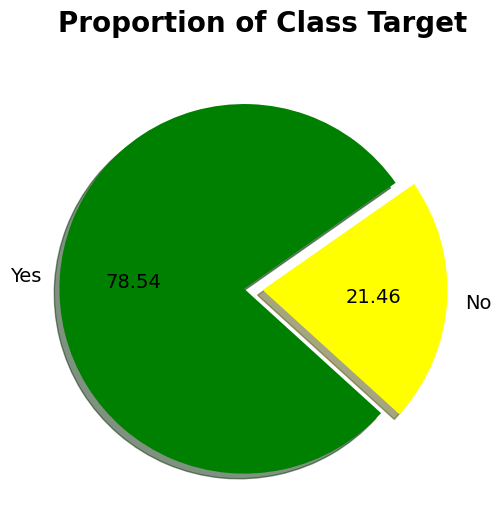

In [ ]:
# Distribution of training target
plt.figure(figsize=(6,6))
plt.pie(
        y_train.value_counts(),
        autopct='%.2f',
        explode=[0.1,0],
        labels=["Yes","No"],
        shadow=True,
        textprops={'fontsize': 14},
        colors=["green","yellow"],
        startangle=35)

plt.title("Proportion of Class Target",fontsize=20, fontweight='bold', pad=20)
plt.show()

# **Exploratory Data Analysis**

In [ ]:
df_cred = pd.read_csv('/content/drive/MyDrive/Credit Risk Assessment/df_cred.csv')
df_cred.head(2)

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,pymnt_time,credit_pull_year
0,0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,Teacher,10+ years,RENT,24000.0,Verified,2011-12-01,1,n,https://www.lendingclub.com/browse/loanDetail....,credit_card,Computer,860xx,AZ,27.65,0.0,1985-01-01,1.0,0.0,3.0,0.0,13648,83.7,9.0,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.0,0.00,0.00,2015-01-01,171.62,2016-01-01,0.0,0.0,1,INDIVIDUAL,0.0,0.0,81539.0,22800.0,37,31
1,1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,2011-12-01,0,n,https://www.lendingclub.com/browse/loanDetail....,car,bike,309xx,GA,1.00,0.0,1999-04-01,5.0,0.0,3.0,0.0,1687,9.4,4.0,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.0,117.08,1.11,2013-04-01,119.66,2013-09-01,0.0,0.0,1,INDIVIDUAL,0.0,0.0,81539.0,22800.0,16,14


## What are the employee titles of our borrowers?



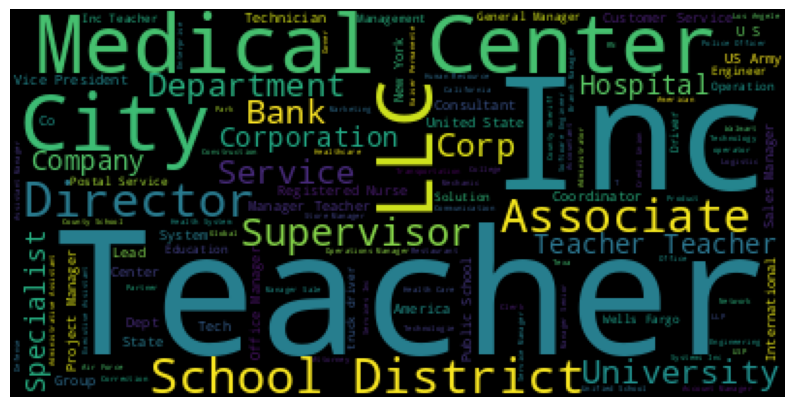

In [ ]:
from wordcloud import WordCloud
wordcloud = WordCloud().generate(' '.join(emp for emp in df_cred.emp_title))

plt.figure(figsize=(10,15))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

## Does the employment length have an impact to good or bad loan?

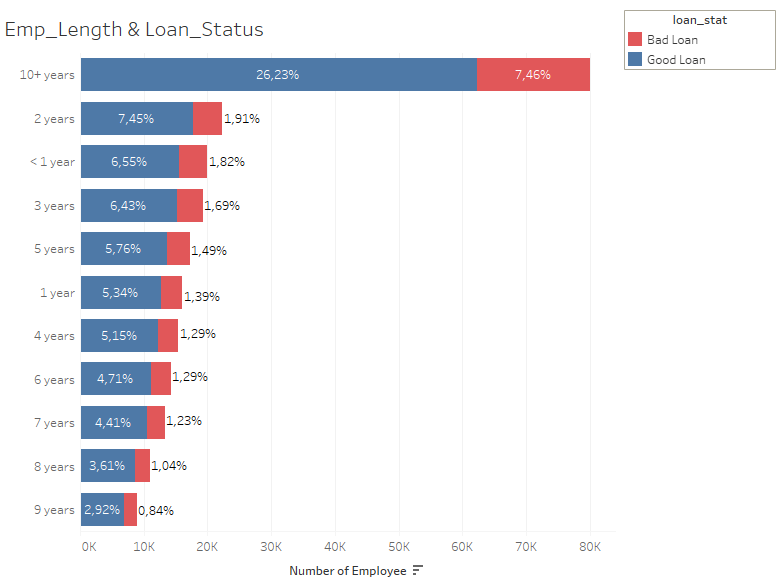

## Why do our borrower take credit loan?

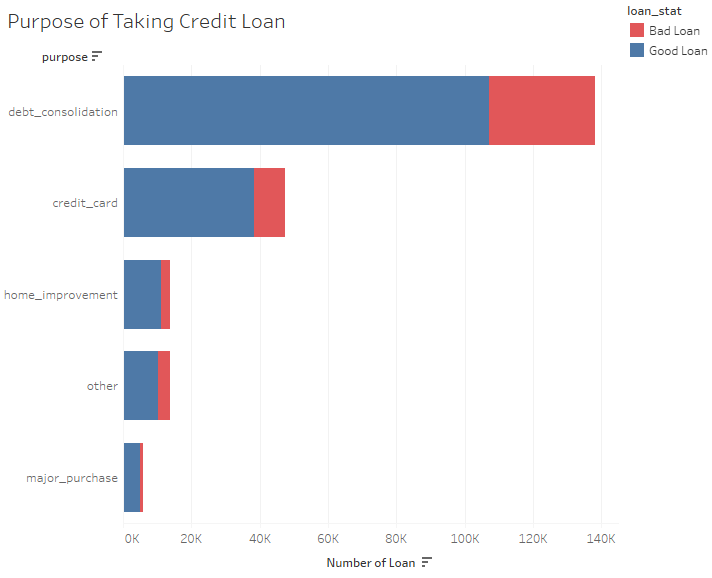

## What can be concluded from good or bad loans based on their number of payments on the loan (term)?

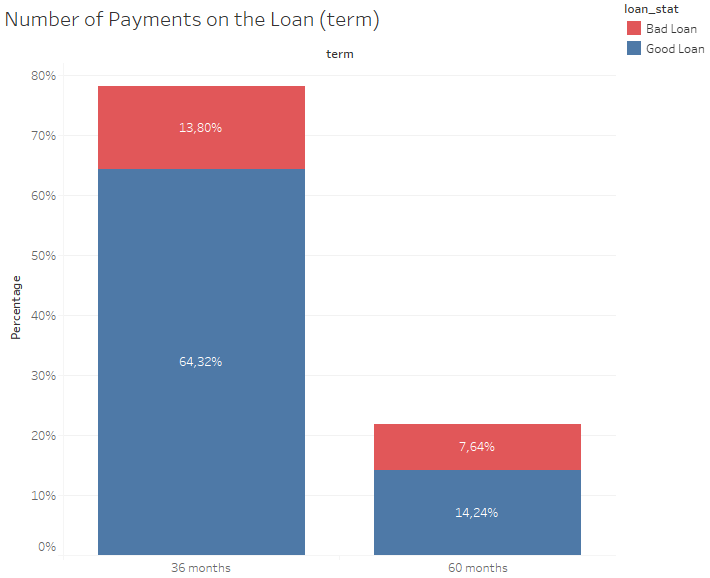

## How about classifying grade towards our borrower and the loan status?

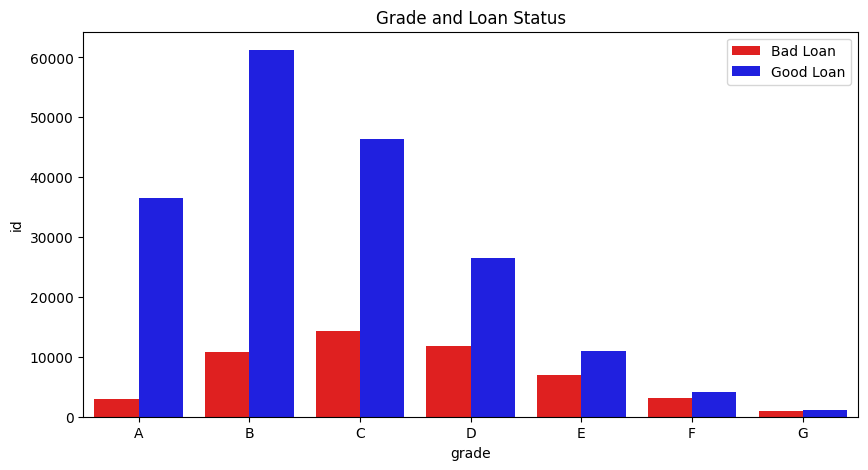

In [ ]:
plt.figure(figsize=(10,5))
grade_loan = df_cred.groupby(['grade', 'loan_status'])['id'].count().reset_index()
# plot with seaborn barplot
p = sns.barplot(data=grade_loan, x='grade', y='id', hue='loan_status',palette=['red','blue'])
plt.title("Grade and Loan Status")
legend_labels, _= p.get_legend_handles_labels()
p.legend(legend_labels,['Bad Loan', 'Good Loan'])
plt.show(p)

# **Modelling**

In [ ]:
df_train_feat = pd.read_csv('/content/drive/MyDrive/Credit Risk Assessment/df_train_feat.csv')
df_train_feat.head(2)

,term,int_rate,installment,grade,emp_length,annual_inc,pymnt_plan,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_util,total_rec_late_fee,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,pymnt_time,credit_pull_year,SubGrade_A,SubGrade_B,SubGrade_C,SubGrade_D,SubGrade_E,SubGrade_F,SubGrade_G,home_ownership_MORTGAGE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,verification_status_Not Verified,verification_status_Source Verified,verification_status_Verified,purpose_credit_card,purpose_debt_consolidation,purpose_major_purchase,purpose_other,purpose_private_use,purpose_small_business,initial_list_status_f,initial_list_status_w
0,36,10.65,162.87,5,10,24000.0,0,27.65,0.0,1.0,0.0,3.0,0.0,83.7,0.0,0.00,171.62,0.0,0.0,0.0,0.0,81539.0,22800.0,37,31,0,2,0,0,0,0,0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,60,15.27,59.83,4,0,30000.0,0,1.00,0.0,5.0,0.0,3.0,0.0,9.4,0.0,1.11,119.66,0.0,0.0,0.0,0.0,81539.0,22800.0,16,14,0,0,4,0,0,0,0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [ ]:
df_train_target = pd.read_csv('/content/drive/MyDrive/Credit Risk Assessment/df_train_target.csv')
df_train_target['loan_status']

0         1
1         0
2         1
3         1
4         1
         ..
230232    0
230233    0
230234    1
230235    0
230236    1
Name: loan_status, Length: 230237, dtype: int64

In [ ]:
from collections import Counter
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_train_feat, df_train_target['loan_status'], test_size=0.3,
                                                    random_state=42, stratify=df_train_target)
print('Class from training data df_train',Counter(y_train))

print('Class from testing data df_test',Counter(y_test))

Class from training data df_train Counter({1: 126579, 0: 34586})
Class from testing data df_test Counter({1: 54249, 0: 14823})


In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer
from imblearn.over_sampling import SMOTE

def log_transform(x):
  return np.log(x + 1)

# Pipeline to transform the numerical features
numerical = ['int_rate','installment','annual_inc','dti','delinq_2yrs','inq_last_6mths','mths_since_last_delinq','open_acc',
             'revol_util','total_rec_late_fee','collection_recovery_fee','last_pymnt_amnt','mths_since_last_major_derog','tot_coll_amt',
             'tot_cur_bal','total_rev_hi_lim','pymnt_time','credit_pull_year']
skewed = ['installment','annual_inc','delinq_2yrs','inq_last_6mths','mths_since_last_delinq','open_acc',
          'revol_util','total_rec_late_fee','collection_recovery_fee','last_pymnt_amnt','mths_since_last_major_derog','tot_coll_amt',
          'tot_cur_bal','total_rev_hi_lim','pymnt_time','credit_pull_year']
diff = list(set(numerical) - set(skewed))

smt = SMOTE(random_state=42)
ss = StandardScaler()
log_transformer = FunctionTransformer(log_transform) # remainder='passthrough'

numerical_transformer = Pipeline([('log', log_transformer),('ss', ss)])
ct = ColumnTransformer([('num_transformer', numerical_transformer, skewed), ('scaler', ss, diff)], remainder='passthrough')

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold, cross_val_predict
from sklearn.metrics import mean_absolute_error
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from scipy.stats import ks_2samp
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb

In [ ]:
def evaluate_ks_and_roc_auc(y_real, y_proba):
    # Unite both visions to be able to filter
    df = pd.DataFrame()
    df['real'] = y_real
    df['proba'] = y_proba[:, 1]

    # Recover each class
    class0 = df[df['real'] == 0]
    class1 = df[df['real'] == 1]

    ks = ks_2samp(class0['proba'], class1['proba'])
    roc_auc = roc_auc_score(df['real'] , df['proba'])

    print(f"ROC AUC: {roc_auc:.4f}")
    print(f"KS: {ks.statistic:.4f} (p-value: {ks.pvalue:.3e})")
    return ks.statistic, roc_auc

In [ ]:
def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):

    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / np.sum(cm).astype('float')
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

Training is success!
ROC AUC: 0.9767
KS: 0.8884 (p-value: 0.000e+00)
Classification report Logistic Regression : 
               precision    recall  f1-score   support

           0       0.81      0.94      0.87     14823
           1       0.98      0.94      0.96     54249

    accuracy                           0.94     69072
   macro avg       0.90      0.94      0.92     69072
weighted avg       0.95      0.94      0.94     69072



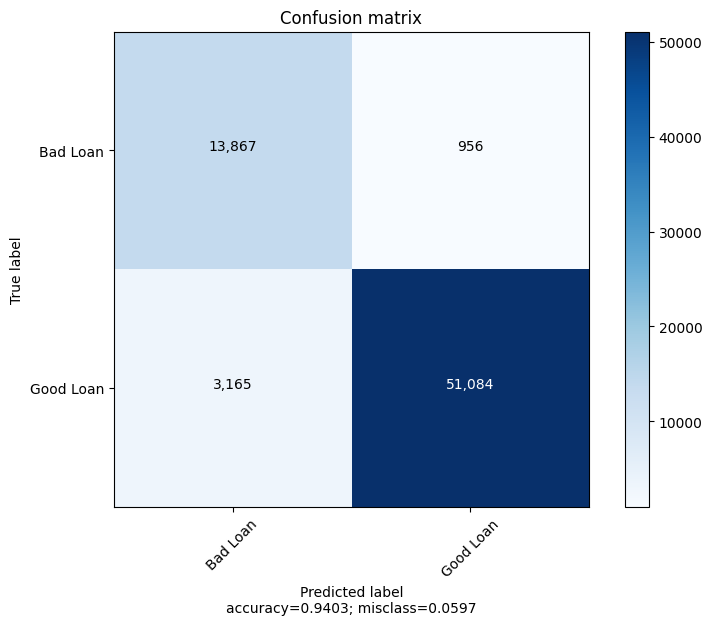

In [ ]:
# Main pipeline for fitting.
model_LR = Pipeline([
                   ('column_transformer', ct),
                   ('smt', smt),
                   ('RF', LogisticRegression(random_state=42) )
          ])
model_LR.fit(X_train, y_train)
print("Training is success!")
y_pred = model_LR.predict_proba(X_test)
predicted = model_LR.predict(X_test)
#print AUC, KS score, and classification report
ks, auc = evaluate_ks_and_roc_auc(y_test, y_pred)
matrix = classification_report(y_test, predicted)
print('Classification report Logistic Regression : \n',matrix)
cm = confusion_matrix(y_test, predicted)
target_names = ["Bad Loan","Good Loan"]
plot_confusion_matrix(cm, target_names, title='Confusion matrix', cmap=None,normalize=False)

In [ ]:
len(model_LR.named_steps['RF'].coef_[0])

47

## Random Forest

Training is success!
ROC AUC: 0.9943
KS: 0.9434 (p-value: 0.000e+00)
Classification report Random Forest Classifier : 
               precision    recall  f1-score   support

           0       0.91      0.96      0.93     14823
           1       0.99      0.97      0.98     54249

    accuracy                           0.97     69072
   macro avg       0.95      0.97      0.96     69072
weighted avg       0.97      0.97      0.97     69072



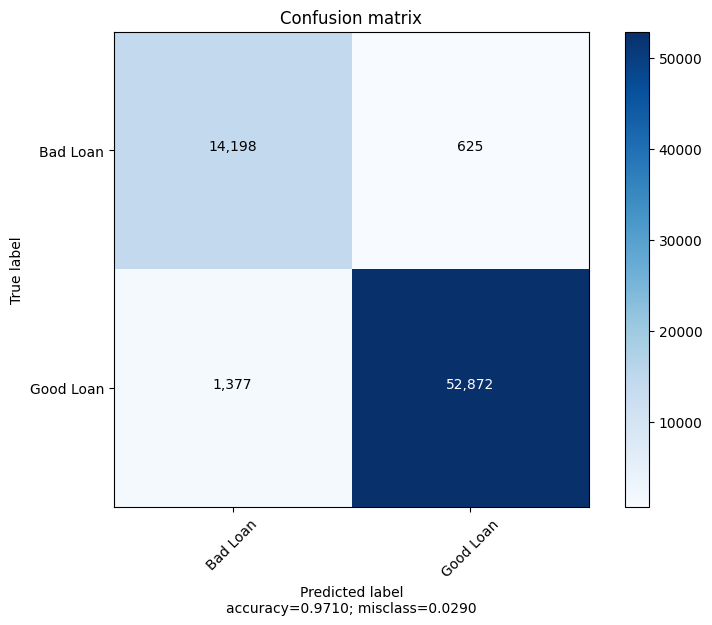

In [ ]:
# Main pipeline for fitting.
model_RF = Pipeline([
                   ('column_transformer', ct),
                   ('smt', smt),
                   ('RF', RandomForestClassifier(random_state=42) )
          ])
model_RF.fit(X_train, y_train)
print("Training is success!")
y_pred = model_RF.predict_proba(X_test)
predicted = model_RF.predict(X_test)
#print AUC, KS score, and classification report
ks, auc = evaluate_ks_and_roc_auc(y_test, y_pred)
matrix = classification_report(y_test, predicted)
print('Classification report Random Forest Classifier : \n',matrix)
cm = confusion_matrix(y_test, predicted)
target_names = ["Bad Loan","Good Loan"]
plot_confusion_matrix(cm, target_names, title='Confusion matrix', cmap=None,normalize=False)

## Gradient Boosting Classifier

Training is success!
ROC AUC: 0.9948
KS: 0.9428 (p-value: 0.000e+00)
Classification report Gradient Boosting Classifier : 
               precision    recall  f1-score   support

           0       0.89      0.97      0.93     14823
           1       0.99      0.97      0.98     54249

    accuracy                           0.97     69072
   macro avg       0.94      0.97      0.95     69072
weighted avg       0.97      0.97      0.97     69072



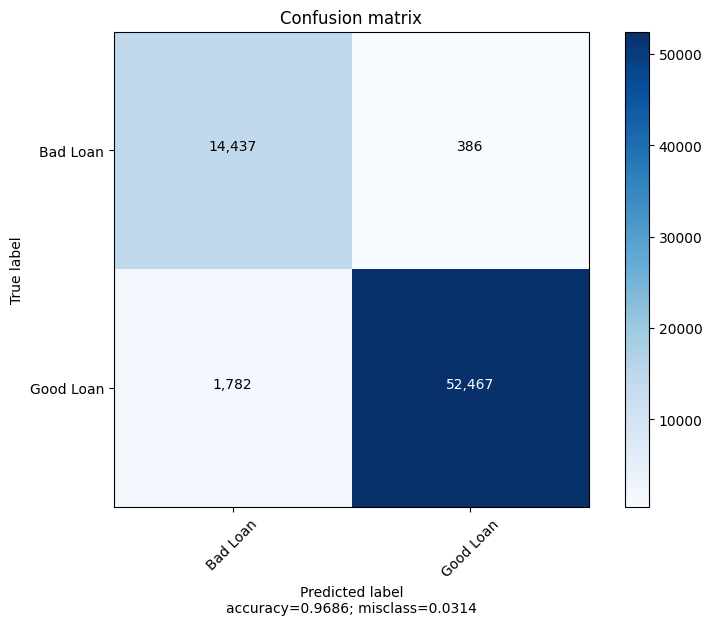

In [ ]:
# Main pipeline for fitting.
model_GB = Pipeline([
                   ('column_transformer', ct),
                   ('smt', smt),
                   ('GB', GradientBoostingClassifier(random_state=42) )
          ])
model_GB.fit(X_train, y_train)
print("Training is success!")
y_pred = model_GB.predict_proba(X_test)
predicted = model_GB.predict(X_test)
#print AUC, KS score, and classification report
ks, auc = evaluate_ks_and_roc_auc(y_test, y_pred)
matrix = classification_report(y_test, predicted)
print('Classification report Gradient Boosting Classifier : \n',matrix)
cm = confusion_matrix(y_test, predicted)
target_names = ["Bad Loan","Good Loan"]
plot_confusion_matrix(cm, target_names, title='Confusion matrix', cmap=None,normalize=False)

## XGBoost Classifier

Training is success!
ROC AUC: 0.9976
KS: 0.9627 (p-value: 0.000e+00)
Classification report XGBoost Classifier : 
               precision    recall  f1-score   support

           0       0.95      0.97      0.96     14823
           1       0.99      0.99      0.99     54249

    accuracy                           0.98     69072
   macro avg       0.97      0.98      0.98     69072
weighted avg       0.98      0.98      0.98     69072



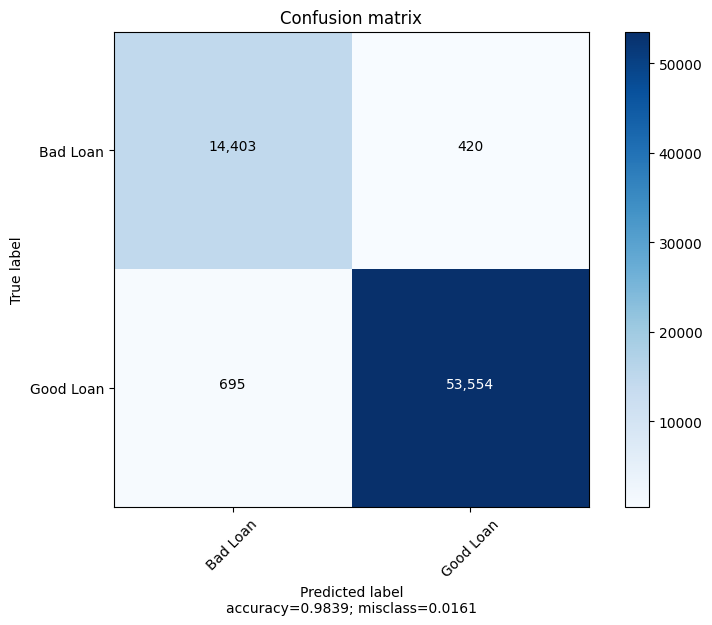

In [ ]:
# Main pipeline for fitting.
model_XGB = Pipeline([
                   ('column_transformer', ct),
                   ('smt', smt),
                   ('XGB', xgb.XGBClassifier(objective="binary:logistic",random_state=42) )
          ])
model_XGB.fit(X_train, y_train)
print("Training is success!")
y_pred = model_XGB.predict_proba(X_test)
predicted = model_XGB.predict(X_test)
#print AUC, KS score, and classification report
ks, auc = evaluate_ks_and_roc_auc(y_test, y_pred)
matrix = classification_report(y_test, predicted)
print('Classification report XGBoost Classifier : \n',matrix)
cm = confusion_matrix(y_test, predicted)
target_names = ["Bad Loan","Good Loan"]
plot_confusion_matrix(cm, target_names, title='Confusion matrix', cmap=None,normalize=False)

## Voting Classifier

Training is success!
ROC AUC: 0.9966
KS: 0.9508 (p-value: 0.000e+00)
Classification report Voting Classifier : 
               precision    recall  f1-score   support

           0       0.92      0.97      0.94     14823
           1       0.99      0.98      0.98     54249

    accuracy                           0.98     69072
   macro avg       0.95      0.97      0.96     69072
weighted avg       0.98      0.98      0.98     69072



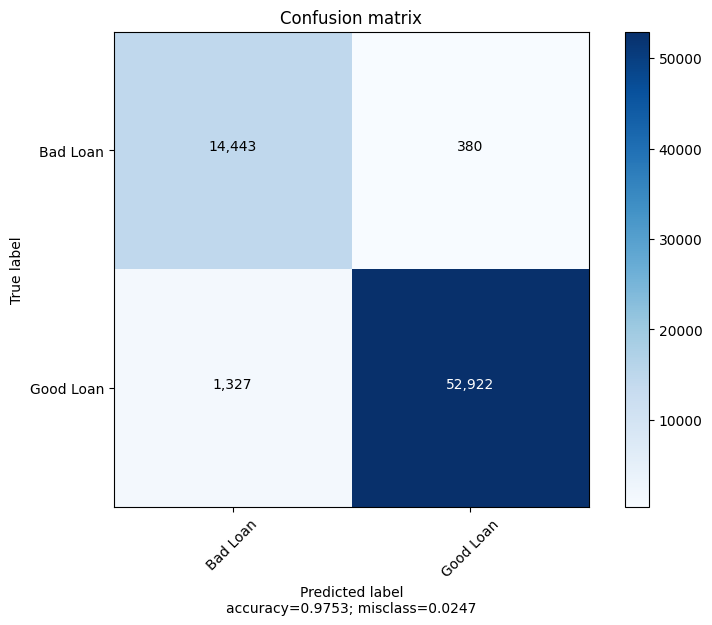

In [ ]:
from sklearn.ensemble import VotingClassifier

clf1 = RandomForestClassifier(random_state=42)
clf2 = GradientBoostingClassifier(random_state=42)
clf3 = xgb.XGBClassifier(objective="binary:logistic",random_state=42)

# Main pipeline for fitting.
model_VC = Pipeline([
                   ('column_transformer', ct),
                   ('smt', smt),
                   ('VC', VotingClassifier(estimators=[('RF', clf1), ('GB', clf2), ('XGB', clf3)],
                        voting='soft', weights=[1,2,1]) )
          ])
model_VC.fit(X_train, y_train)
print("Training is success!")
y_pred = model_VC.predict_proba(X_test)
predicted = model_VC.predict(X_test)
#print AUC, KS score, and classification report
ks, auc = evaluate_ks_and_roc_auc(y_test, y_pred)
matrix = classification_report(y_test, predicted)
print('Classification report Voting Classifier : \n',matrix)
cm = confusion_matrix(y_test, predicted)
target_names = ["Bad Loan","Good Loan"]
plot_confusion_matrix(cm, target_names, title='Confusion matrix', cmap=None,normalize=False)

# **Model Optimization & Evaluation**

Chosen model: XGBoost Classifier

## Hyperparameter Tuning


In [ ]:
from sklearn.model_selection import GridSearchCV

# Define a range of hyperparameters
param_grid = {
    'XGB__n_estimators': [100, 200, 300],
    'XGB__max_depth': [3, 4, 5],
    'XGB__learning_rate': [0.01, 0.1, 0.2],
    # Add other parameters here
}

# Create a GridSearchCV object
grid_search = GridSearchCV(model_XGB, param_grid, scoring='roc_auc', cv=3, verbose=2)


## Fit the Model with Grid Search

In [ ]:
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 27 candidates, totalling 81 fits
[CV] END XGB__learning_rate=0.01, XGB__max_depth=3, XGB__n_estimators=100; total time=   8.0s
[CV] END XGB__learning_rate=0.01, XGB__max_depth=3, XGB__n_estimators=100; total time=  10.6s
[CV] END XGB__learning_rate=0.01, XGB__max_depth=3, XGB__n_estimators=100; total time=   6.8s
[CV] END XGB__learning_rate=0.01, XGB__max_depth=3, XGB__n_estimators=200; total time=  12.1s
[CV] END XGB__learning_rate=0.01, XGB__max_depth=3, XGB__n_estimators=200; total time=  12.5s
[CV] END XGB__learning_rate=0.01, XGB__max_depth=3, XGB__n_estimators=200; total time=   9.0s
[CV] END XGB__learning_rate=0.01, XGB__max_depth=3, XGB__n_estimators=300; total time=  14.0s
[CV] END XGB__learning_rate=0.01, XGB__max_depth=3, XGB__n_estimators=300; total time=  14.3s
[CV] END XGB__learning_rate=0.01, XGB__max_depth=3, XGB__n_estimators=300; total time=  14.8s
[CV] END XGB__learning_rate=0.01, XGB__max_depth=4, XGB__n_estimators=100; total time=  10.8s

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('column_transformer',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('num_transformer',
                                                                         Pipeline(steps=[('log',
                                                                                          FunctionTransformer(func=<function log_transform at 0x78cc68c0cd30>)),
                                                                                         ('ss',
                                                                                          StandardScaler())]),
                                                                         ['installment',
                                                                          'annual_inc',
                                                                          'delinq_2yrs',
                                                                          'inq_last_6mths',
                                                                          'mths_since_last_delinq',
                                                                          'open_acc...
                                                      max_cat_to_onehot=None,
                                                      max_delta_step=None,
                                                      max_depth=None,
                                                      max_leaves=None,
                                                      min_child_weight=None,
                                                      missing=nan,
                                                      monotone_constraints=None,
                                                      multi_strategy=None,
                                                      n_estimators=None,
                                                      n_jobs=None,
                                                      num_parallel_tree=None,
                                                      random_state=42, ...))]),
             param_grid={'XGB__learning_rate': [0.01, 0.1, 0.2],
                         'XGB__max_depth': [3, 4, 5],
                         'XGB__n_estimators': [100, 200, 300]},
             scoring='roc_auc', verbose=2)

## Best Parameters and Model

In [ ]:
print("Best Parameters:", grid_search.best_params_)
best_model = grid_search.best_estimator_

Best Parameters: {'XGB__learning_rate': 0.2, 'XGB__max_depth': 5, 'XGB__n_estimators': 300}


## Model Evaluation

(69072, 2)
ROC AUC: 0.9977
KS: 0.9642 (p-value: 0.000e+00)
Classification report for Optimized XGBoost Classifier:
               precision    recall  f1-score   support

           0       0.96      0.97      0.96     14823
           1       0.99      0.99      0.99     54249

    accuracy                           0.98     69072
   macro avg       0.98      0.98      0.98     69072
weighted avg       0.98      0.98      0.98     69072



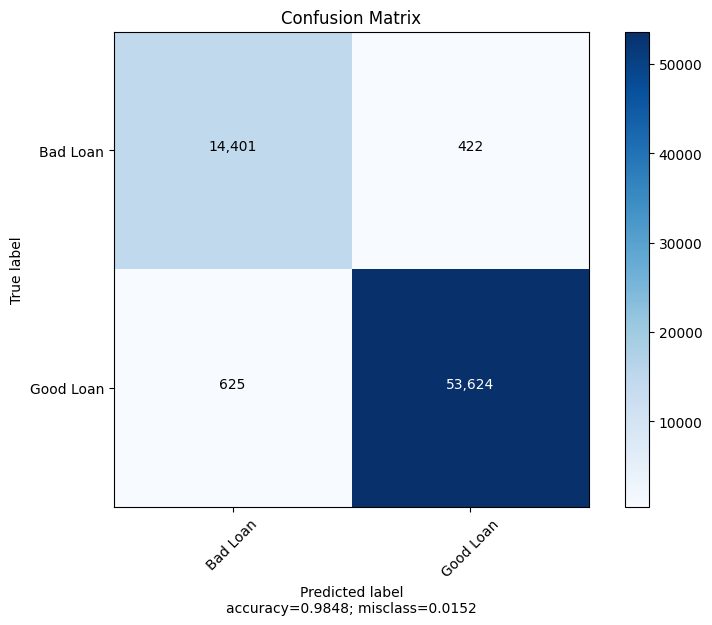

In [ ]:
y_pred_proba = best_model.predict_proba(X_test)
print(y_pred_proba.shape)

predicted = best_model.predict(X_test)
# Evaluate AUC and KS Score
ks, auc = evaluate_ks_and_roc_auc(y_test, y_pred_proba)

# Classification Report and Confusion Matrix
matrix = classification_report(y_test, predicted)
print('Classification report for Optimized XGBoost Classifier:\n', matrix)

cm = confusion_matrix(y_test, predicted)
plot_confusion_matrix(cm, target_names, title='Confusion Matrix', cmap=None, normalize=False)



In [ ]:
print(f'AUC Score: {auc}')
print(f'KS Score: {ks}')

AUC Score: 0.9977279627053501
KS Score: 0.9641972029333404


## Model Checking

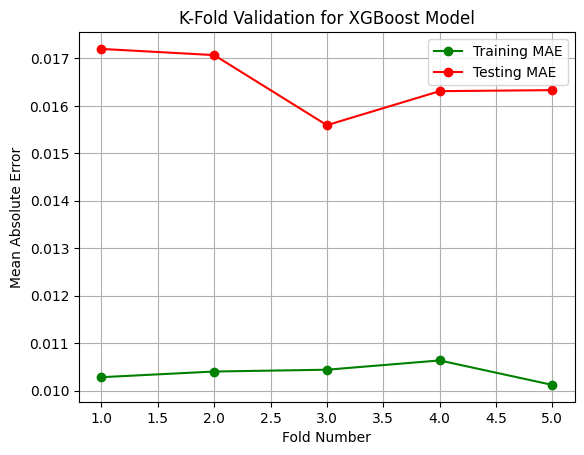

In [ ]:
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import KFold

scores_train = []
scores_test = []

xgb_model = model_XGB
kf = KFold(shuffle=True, random_state=42, n_splits=5)

for train_index, test_index in kf.split(df_train_feat):
    # Separate training and testing data based on index
    X_train, X_test = df_train_feat.iloc[train_index], df_train_feat.iloc[test_index]
    y_train, y_test = df_train_target.iloc[train_index], df_train_target.iloc[test_index]

    # Train the model with training data
    xgb_model.fit(X_train, y_train)

    # Make predictions on training and testing data
    y_train_pred = xgb_model.predict(X_train)
    y_test_pred = xgb_model.predict(X_test)

    # Calculating the mean absolute error for training and testing
    score_train = mean_absolute_error(y_train, y_train_pred)
    score_test = mean_absolute_error(y_test, y_test_pred)

    scores_train.append(score_train)
    scores_test.append(score_test)

# Visualization of K-Fold Cross-Validation results
folds = range(1, kf.get_n_splits() + 1)
plt.plot(folds, scores_train, 'o-', color='green', label='Training MAE')
plt.plot(folds, scores_test, 'o-', color='red', label='Testing MAE')
plt.legend()
plt.grid()
plt.xlabel('Fold Number')
plt.ylabel('Mean Absolute Error')
plt.title('K-Fold Validation for XGBoost Model')
plt.show()

# **Model Interpretation**

Top 10 Feature Importances in the Model

<Figure size 1000x600 with 0 Axes>

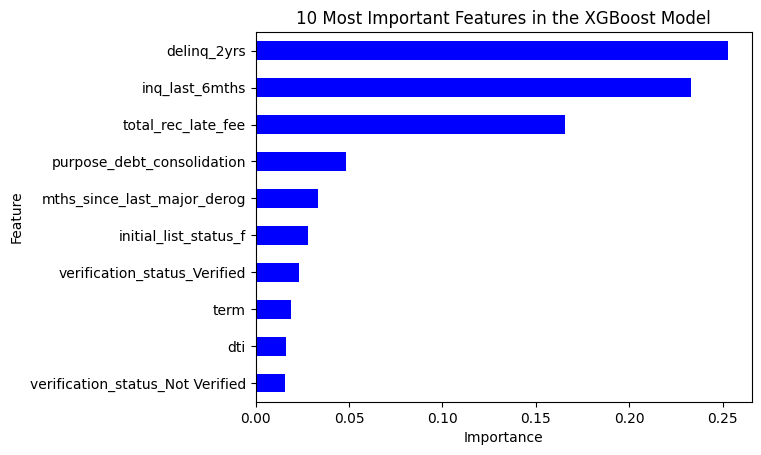

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Extract the features and importance of the XGBoost model
feature_importances = pd.DataFrame()
feature_importances['feature'] = X_train.columns
feature_importances['importance'] = model_XGB.named_steps['XGB'].feature_importances_

# Visualization of the 10 most important features
plt.figure(figsize=(10, 6))
plot = feature_importances.sort_values('importance', ascending=False).head(10).plot.barh(color='blue', legend=None)
plot.set_yticklabels(feature_importances.sort_values('importance', ascending=False).head(10).feature)
plt.title('10 Most Important Features in the XGBoost Model')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.gca().invert_yaxis()
plt.show()

Top 3 feature importances in predicting credit risk is good or bad:

* `delinq_2yrs`: The number of 30+ days past-due incidences of delinquency in the borrower's credit file for the past 2 years
* `inq_last_6mths`: Number of credit inquiries in past 12 months
* `total_rec_late_fee`: Late fees received to date